# Suicide analysis by Gender and Age range 25-34


## Import data and preprocessing

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
ager = df["age"].unique()
ager.sort()
lst = [ager[3], ager[0], ager[1], ager[2], ager[4], ager[5]]
lst

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [ ]:
# #DIVISION OF DF BY AGE RANGE

df25 = df[df["age"] == lst[2]]
df25 = df25.reset_index(drop=True)


In [ ]:
male_df = df25[df25["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df25[df25["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...           0            0          0
1     Argentina  1986  male  ...           0            0          0
2     Argentina  1987  male  ...           0            0          0
3     Argentina  1988  male  ...           0            0          0
4     Argentina  1989  male  ...           0            0          0
...         ...   ...   ...  ...         ...          ...        ...
1649    Uruguay  2010  male  ...           0            0          0
1650    Uruguay  2012  male  ...           0            0          0
1651    Uruguay  2013  male  ...           0            0          0
1652    Uruguay  2014  male  ...           0            0          0
1653    Uruguay  2015  male  ...           0            0          0

[1654 rows x 34 columns]

In [ ]:
print(len(male_df))
print(len(female_df))


1654
1654


In [ ]:
male_df.isnull().sum()

country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)


In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...           0            0          0
1     Argentina  1986  female  ...           0            0          0
2     Argentina  1987  female  ...           0            0          0
3     Argentina  1988  female  ...           0            0          0
4     Argentina  1989  female  ...           0            0          0
...         ...   ...     ...  ...         ...          ...        ...
1649    Uruguay  2010  female  ...           0            0          0
1650    Uruguay  2012  female  ...           0            0          0
1651    Uruguay  2013  female  ...           0            0          0
1652    Uruguay  2014  female  ...           0            0          0
1653    Uruguay  2015  female  ...           0            0          0

[1654 rows x 34 columns]

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)

In [ ]:
male_df

country   sex          age  ...  35-54 years  55-74 years  75+ years
year                                  ...                                     
1985    Argentina  male  25-34 years  ...            0            0          0
1985    Australia  male  25-34 years  ...            0            0          0
1985      Austria  male  25-34 years  ...            0            0          0
1985     Barbados  male  25-34 years  ...            0            0          0
1985      Belgium  male  25-34 years  ...            0            0          0
...           ...   ...          ...  ...          ...          ...        ...
2016    Mauritius  male  25-34 years  ...            0            0          0
2016  Netherlands  male  25-34 years  ...            0            0          0
2016      Romania  male  25-34 years  ...            0            0          0
2016       Sweden  male  25-34 years  ...            0            0          0
2016     Thailand  male  25-34 years  ...            0            0          0

[1654 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]

country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]

fecountry = female_df["country"].unique()



In [ ]:
targets

Index(['suicides_no'], dtype='object')

### 1 A. Extract time series for each country

Men range 15-24 year Argentina 's suicides_no


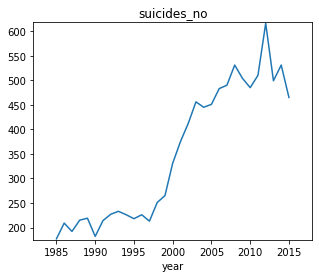

Men range 15-24 year Australia 's suicides_no


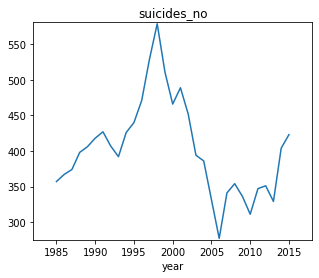

Men range 15-24 year Austria 's suicides_no


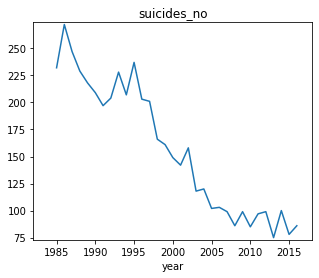

Men range 15-24 year Barbados 's suicides_no


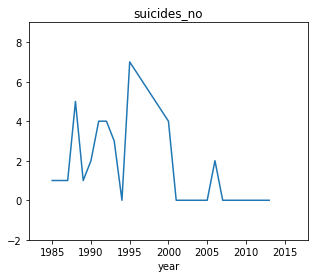

Men range 15-24 year Belgium 's suicides_no


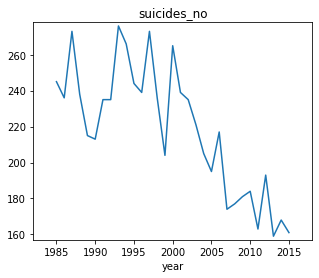

Men range 15-24 year Brazil 's suicides_no


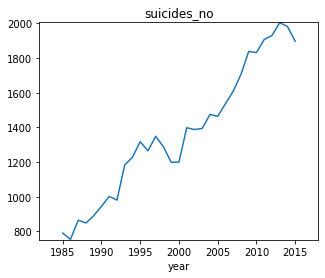

Men range 15-24 year Bulgaria 's suicides_no


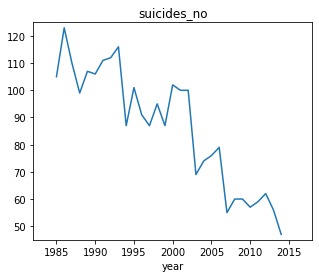

Men range 15-24 year Canada 's suicides_no


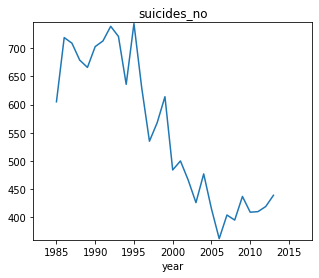

Men range 15-24 year Chile 's suicides_no


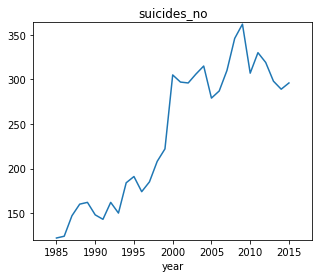

Men range 15-24 year Colombia 's suicides_no


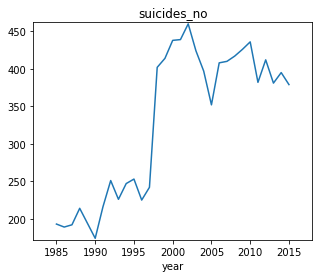

Men range 15-24 year Costa Rica 's suicides_no


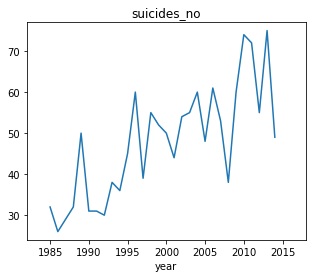

Men range 15-24 year Ecuador 's suicides_no


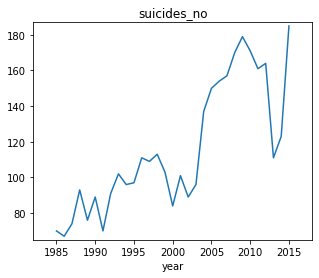

Men range 15-24 year France 's suicides_no


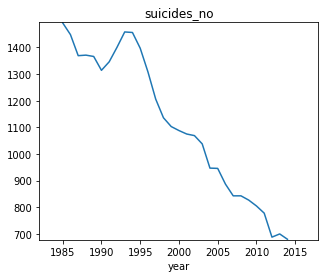

Men range 15-24 year Greece 's suicides_no


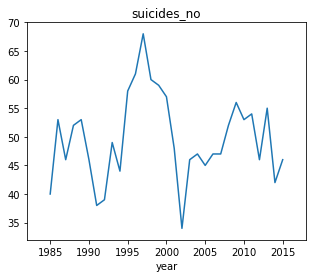

Men range 15-24 year Grenada 's suicides_no


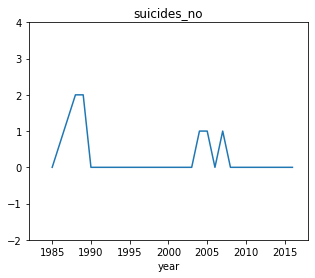

Men range 15-24 year Iceland 's suicides_no


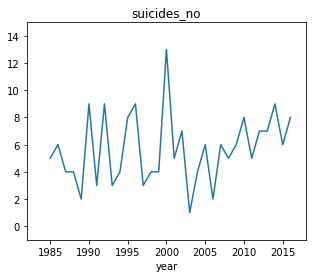

Men range 15-24 year Ireland 's suicides_no


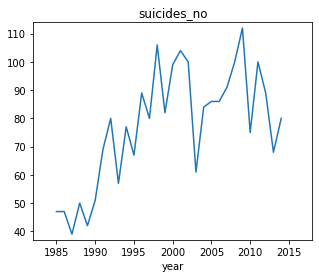

Men range 15-24 year Israel 's suicides_no


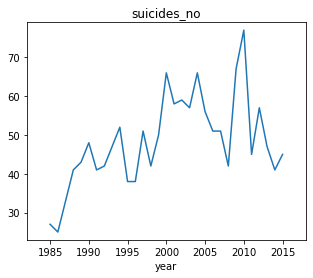

Men range 15-24 year Italy 's suicides_no


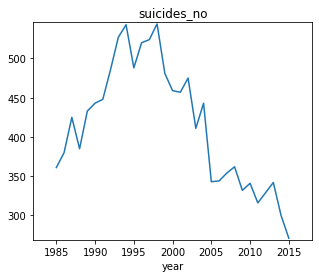

Men range 15-24 year Japan 's suicides_no


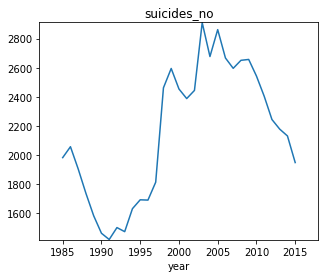

Men range 15-24 year Kuwait 's suicides_no


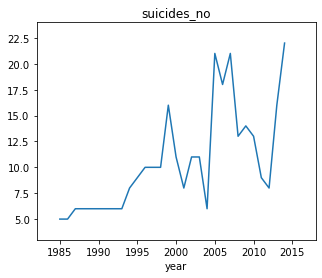

Men range 15-24 year Luxembourg 's suicides_no


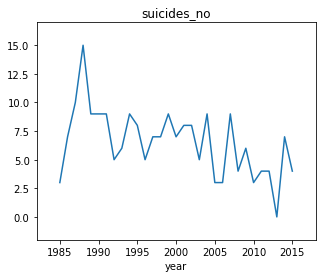

Men range 15-24 year Malta 's suicides_no


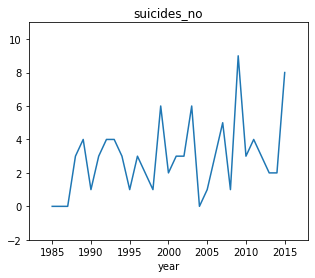

Men range 15-24 year Mauritius 's suicides_no


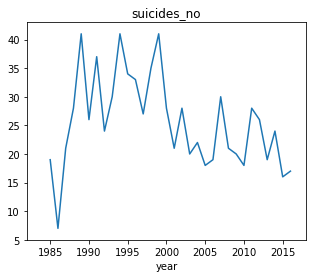

Men range 15-24 year Mexico 's suicides_no


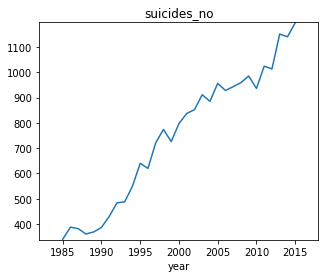

Men range 15-24 year Netherlands 's suicides_no


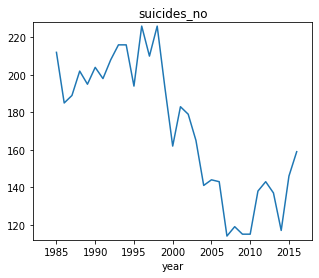

Men range 15-24 year New Zealand 's suicides_no


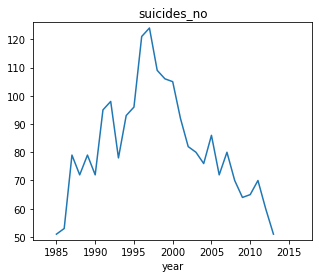

Men range 15-24 year Panama 's suicides_no


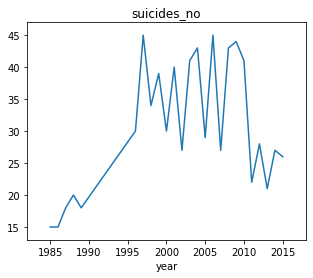

Men range 15-24 year Paraguay 's suicides_no


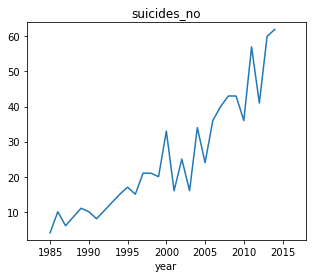

Men range 15-24 year Portugal 's suicides_no


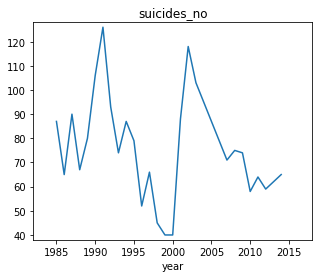

Men range 15-24 year Puerto Rico 's suicides_no


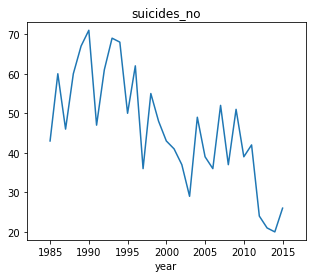

Men range 15-24 year Republic of Korea 's suicides_no


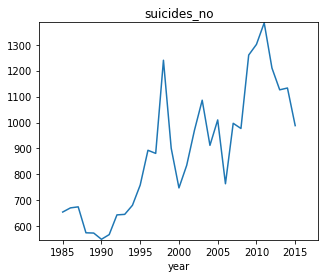

Men range 15-24 year Saint Vincent and Grenadines 's suicides_no


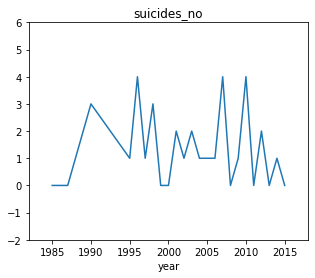

Men range 15-24 year Singapore 's suicides_no


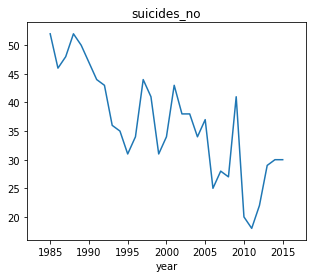

Men range 15-24 year Spain 's suicides_no


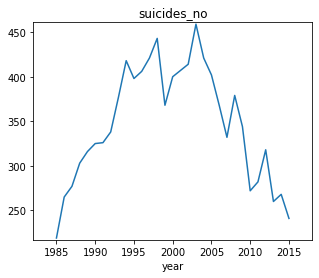

Men range 15-24 year Suriname 's suicides_no


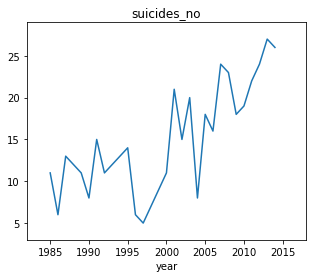

Men range 15-24 year Thailand 's suicides_no


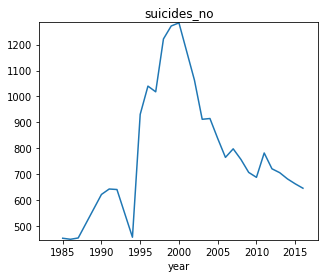

Men range 15-24 year Trinidad and Tobago 's suicides_no


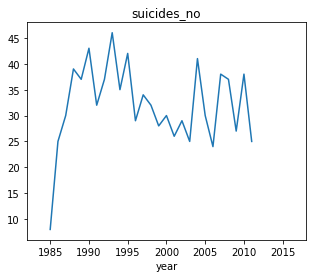

Men range 15-24 year United Kingdom 's suicides_no


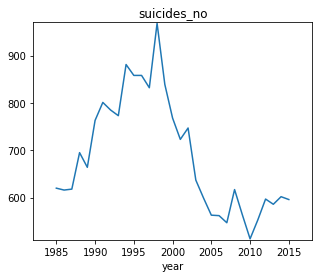

Men range 15-24 year United States 's suicides_no


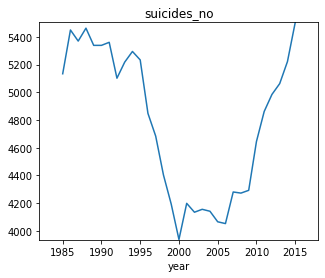

Men range 15-24 year Uruguay 's suicides_no


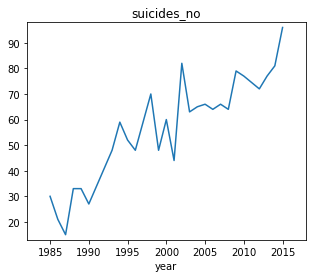

Men range 15-24 year Belize 's suicides_no


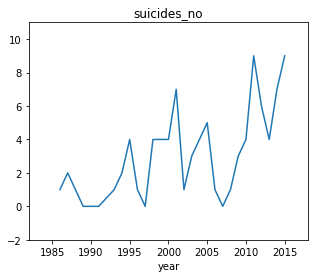

Men range 15-24 year Guatemala 's suicides_no


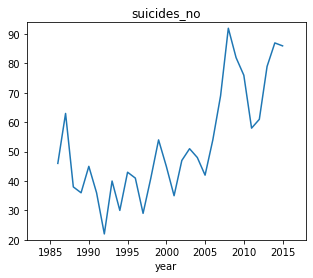

Men range 15-24 year Norway 's suicides_no


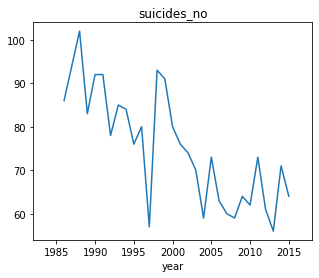

Men range 15-24 year Saint Lucia 's suicides_no


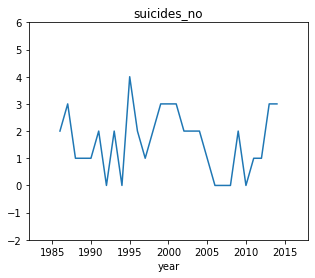

Men range 15-24 year Finland 's suicides_no


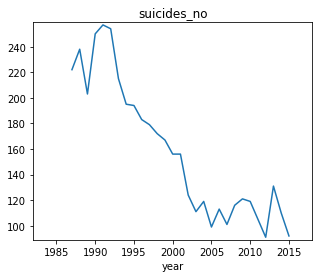

Men range 15-24 year Sweden 's suicides_no


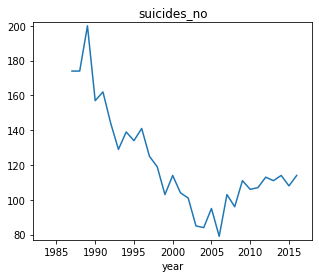

Men range 15-24 year Guyana 's suicides_no


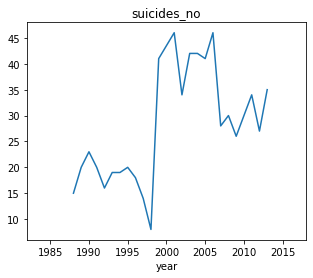

Men range 15-24 year Ukraine 's suicides_no


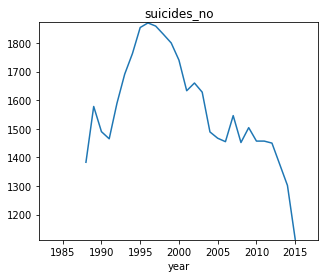

Men range 15-24 year Romania 's suicides_no


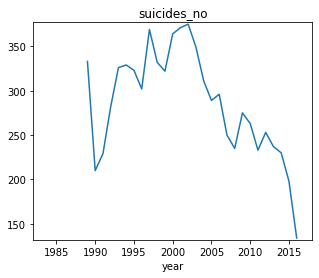

Men range 15-24 year Russian Federation 's suicides_no


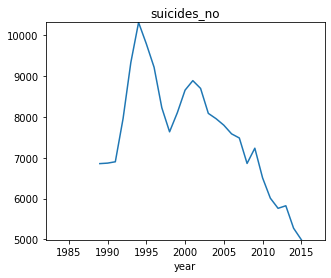

Men range 15-24 year Armenia 's suicides_no


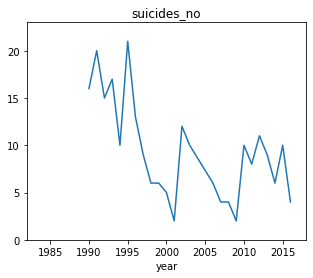

Men range 15-24 year Czech Republic 's suicides_no


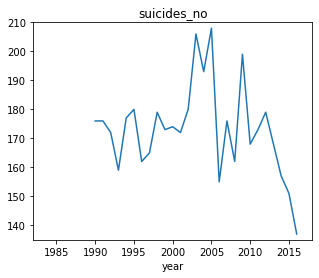

Men range 15-24 year Germany 's suicides_no


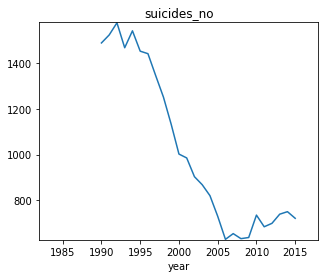

Men range 15-24 year Kazakhstan 's suicides_no


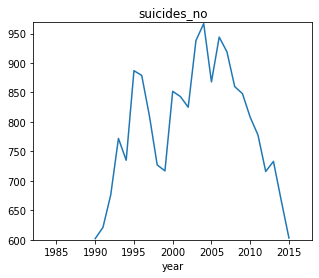

Men range 15-24 year Kyrgyzstan 's suicides_no


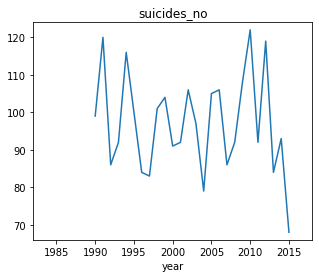

Men range 15-24 year Hungary 's suicides_no


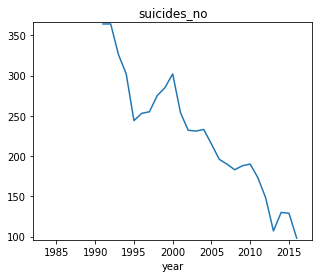

In [ ]:
# For male
for s in country:
    # j = 0
    for t in targets:
      print("Men range 15-24 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()


Women  Argentina 's suicides_no


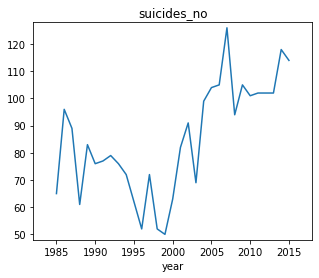

Women  Australia 's suicides_no


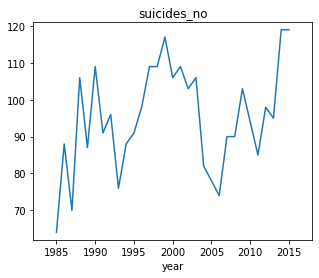

Women  Austria 's suicides_no


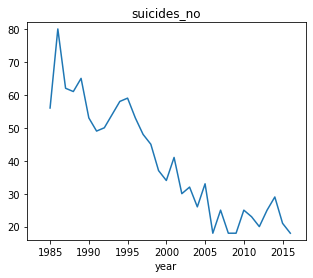

Women  Barbados 's suicides_no


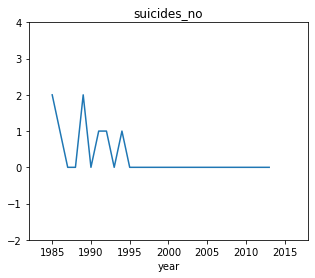

Women  Belgium 's suicides_no


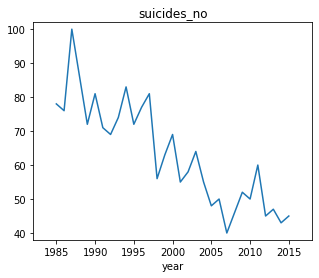

Women  Brazil 's suicides_no


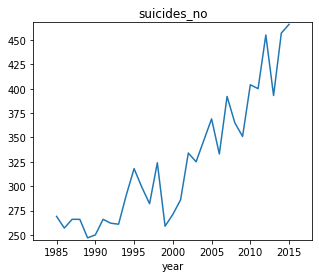

Women  Bulgaria 's suicides_no


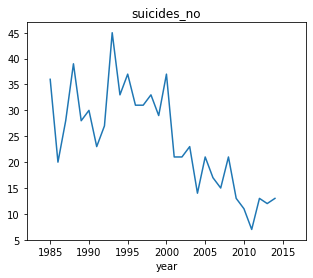

Women  Canada 's suicides_no


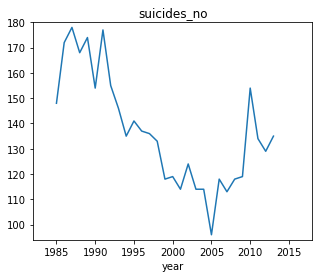

Women  Chile 's suicides_no


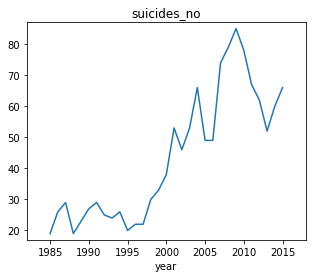

Women  Colombia 's suicides_no


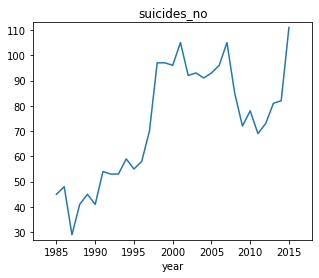

Women  Costa Rica 's suicides_no


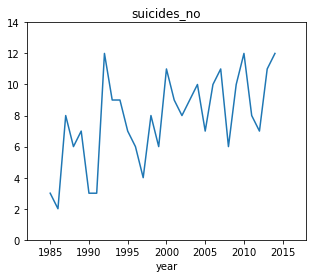

Women  Ecuador 's suicides_no


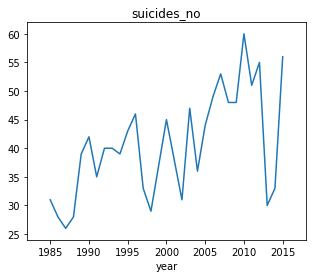

Women  France 's suicides_no


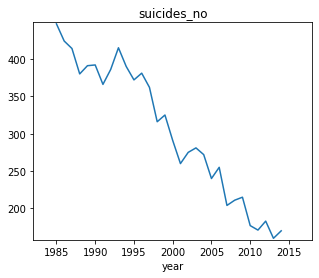

Women  Greece 's suicides_no


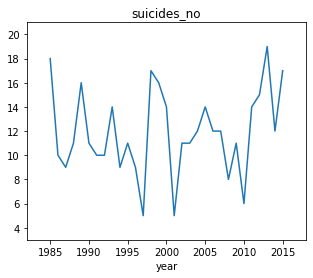

Women  Grenada 's suicides_no


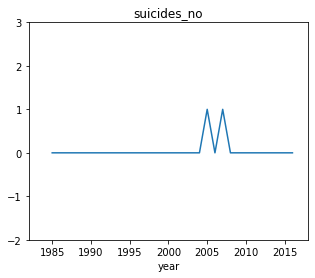

Women  Iceland 's suicides_no


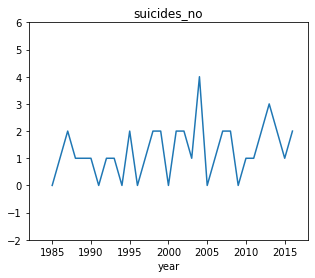

Women  Ireland 's suicides_no


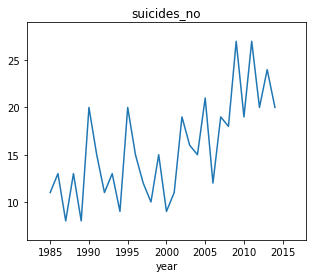

Women  Israel 's suicides_no


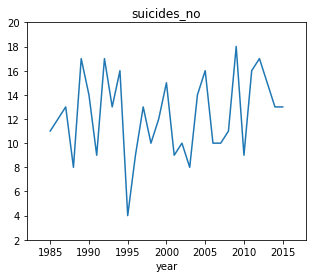

Women  Italy 's suicides_no


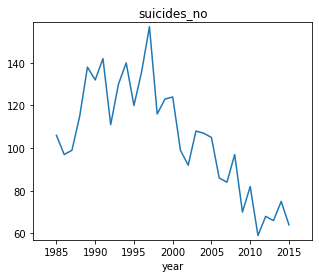

Women  Japan 's suicides_no


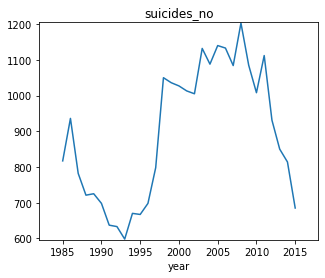

Women  Kuwait 's suicides_no


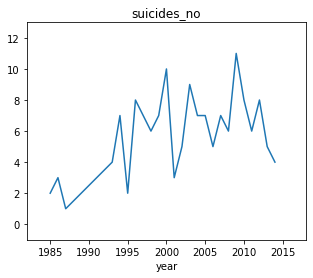

Women  Luxembourg 's suicides_no


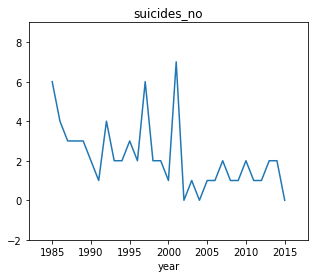

Women  Malta 's suicides_no


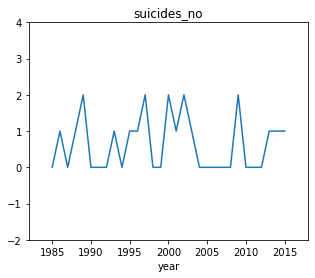

Women  Mauritius 's suicides_no


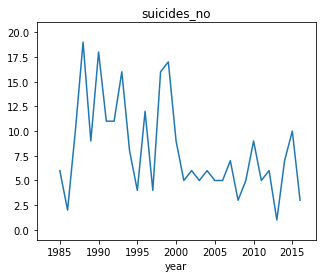

Women  Mexico 's suicides_no


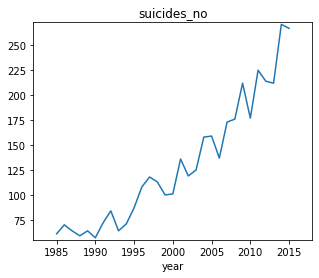

Women  Netherlands 's suicides_no


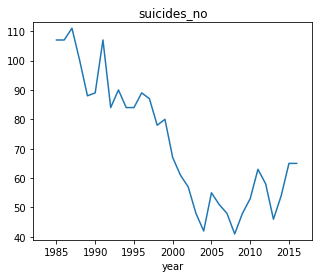

Women  New Zealand 's suicides_no


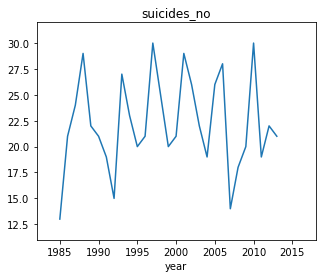

Women  Panama 's suicides_no


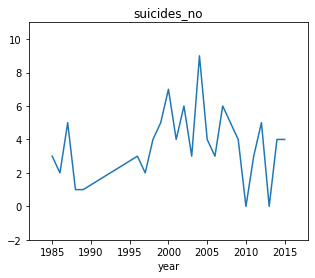

Women  Paraguay 's suicides_no


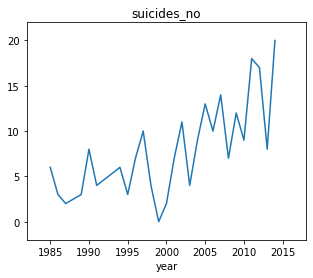

Women  Portugal 's suicides_no


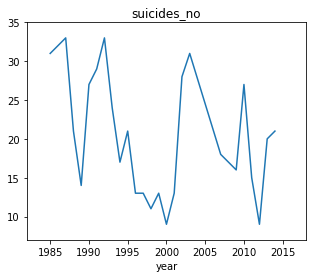

Women  Puerto Rico 's suicides_no


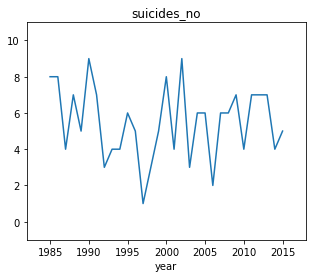

Women  Republic of Korea 's suicides_no


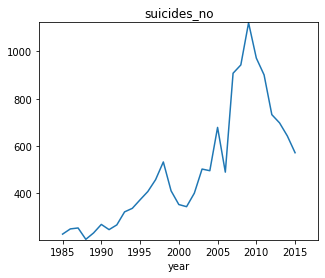

Women  Saint Vincent and Grenadines 's suicides_no


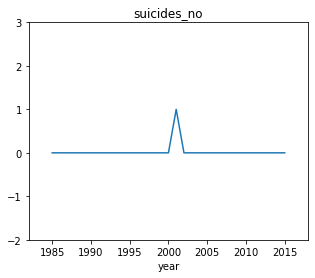

Women  Singapore 's suicides_no


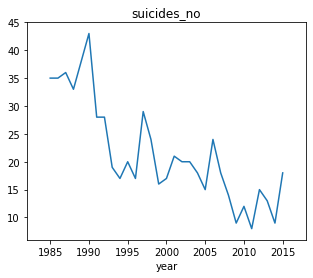

Women  Spain 's suicides_no


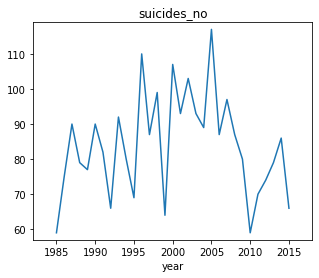

Women  Suriname 's suicides_no


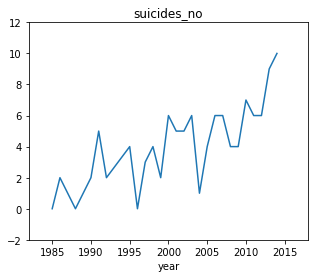

Women  Thailand 's suicides_no


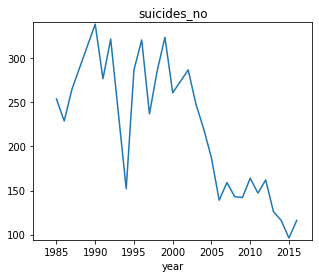

Women  Trinidad and Tobago 's suicides_no


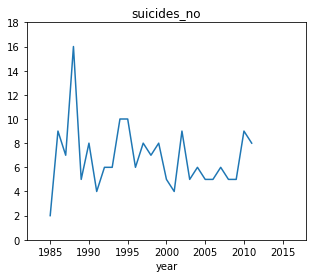

Women  United Kingdom 's suicides_no


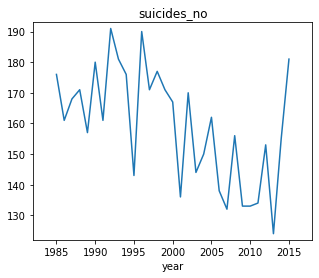

Women  United States 's suicides_no


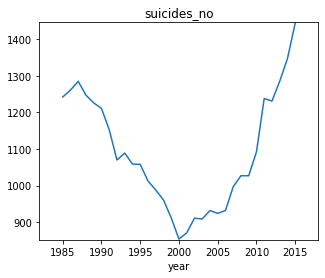

Women  Uruguay 's suicides_no


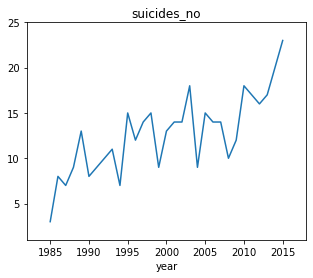

Women  Belize 's suicides_no


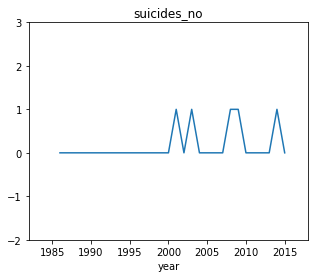

Women  Guatemala 's suicides_no


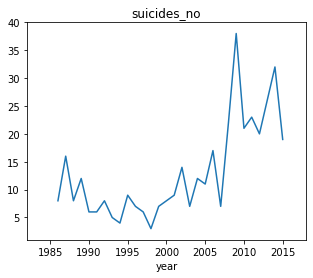

Women  Norway 's suicides_no


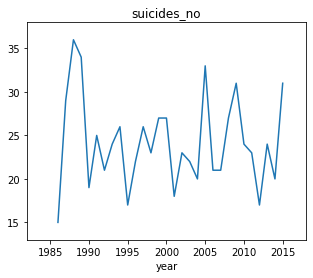

Women  Saint Lucia 's suicides_no


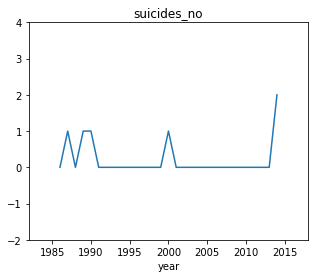

Women  Finland 's suicides_no


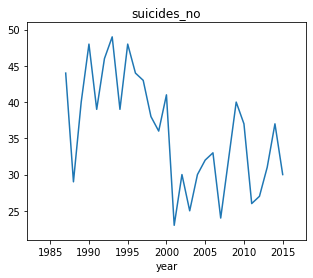

Women  Sweden 's suicides_no


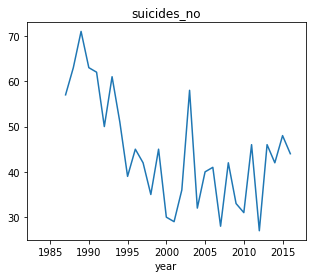

Women  Guyana 's suicides_no


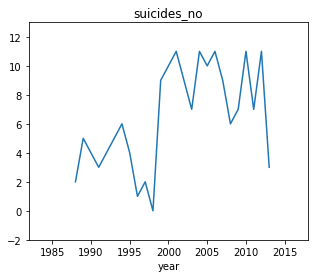

Women  Ukraine 's suicides_no


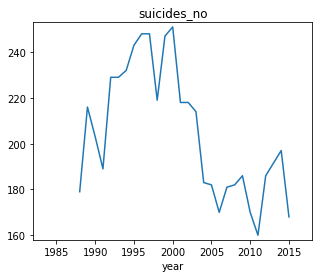

Women  Romania 's suicides_no


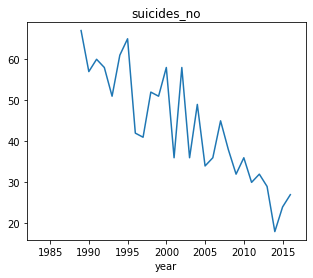

Women  Russian Federation 's suicides_no


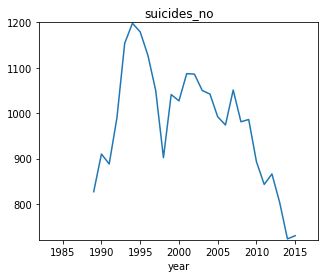

Women  Armenia 's suicides_no


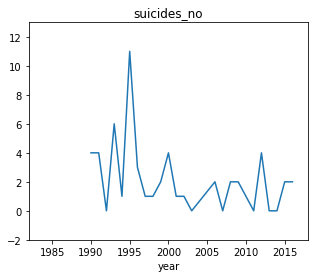

Women  Czech Republic 's suicides_no


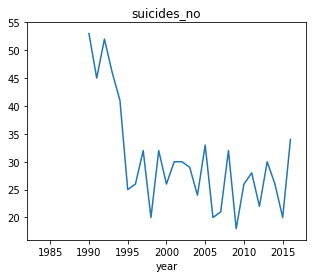

Women  Germany 's suicides_no


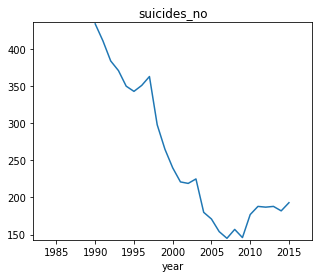

Women  Kazakhstan 's suicides_no


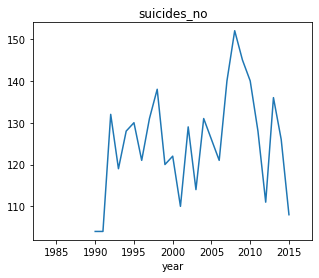

Women  Kyrgyzstan 's suicides_no


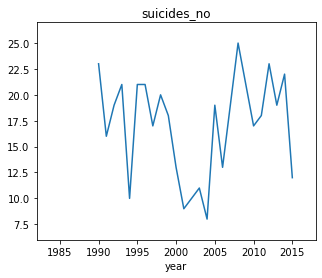

Women  Hungary 's suicides_no


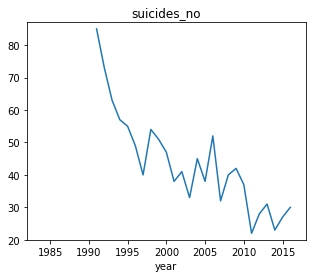

In [ ]:
# For female
for s in fecountry:
    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()

### 1 B. Plot the suicide time series for all countries.

In [ ]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)
pivot_test_fem

suicides_no                    ...                                     
country   Argentina Armenia Australia  ... United Kingdom United States Uruguay
year                                   ...                                     
1985           65.0     NaN      64.0  ...          176.0        1242.0     3.0
1986           96.0     NaN      88.0  ...          161.0        1261.0     8.0
1987           89.0     NaN      70.0  ...          168.0        1285.0     7.0
1988           61.0     NaN     106.0  ...          171.0        1247.0     9.0
1989           83.0     NaN      87.0  ...          157.0        1226.0    13.0
1990           76.0     4.0     109.0  ...          180.0        1211.0     8.0
1991           77.0     4.0      91.0  ...          161.0        1153.0     NaN
1992           79.0     0.0      96.0  ...          191.0        1070.0     NaN
1993           76.0     6.0      76.0  ...          181.0        1089.0    11.0
1994           72.0     1.0      88.0  ...          176.0        1059.0     7.0
1995           62.0    11.0      91.0  ...          143.0        1058.0    15.0
1996           52.0     3.0      98.0  ...          190.0        1013.0    12.0
1997           72.0     1.0     109.0  ...          171.0         988.0    14.0
1998           52.0     1.0     109.0  ...          177.0         961.0    15.0
1999           50.0     2.0     117.0  ...          171.0         912.0     9.0
2000           63.0     4.0     106.0  ...          167.0         854.0    13.0
2001           82.0     1.0     109.0  ...          136.0         871.0    14.0
2002           91.0     1.0     103.0  ...          170.0         911.0    14.0
2003           69.0     0.0     106.0  ...          144.0         909.0    18.0
2004           99.0     NaN      82.0  ...          150.0         932.0     9.0
2005          104.0     NaN       NaN  ...          162.0         924.0    15.0
2006          105.0     2.0      74.0  ...          138.0         932.0    14.0
2007          126.0     0.0      90.0  ...          132.0         997.0    14.0
2008           94.0     2.0      90.0  ...          156.0        1027.0    10.0
2009          105.0     2.0     103.0  ...          133.0        1027.0    12.0
2010          101.0     1.0      94.0  ...          133.0        1092.0    18.0
2011          102.0     0.0      85.0  ...          134.0        1238.0     NaN
2012          102.0     4.0      98.0  ...          153.0        1231.0    16.0
2013          102.0     0.0      95.0  ...          124.0        1285.0    17.0
2014          118.0     0.0     119.0  ...          155.0        1347.0    20.0
2015          114.0     2.0     119.0  ...          181.0        1444.0    23.0
2016            NaN     2.0       NaN  ...            NaN           NaN     NaN

[32 rows x 57 columns]

In [ ]:
timeSeriesRes = pivot_test["suicides_no"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["suicides_no"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina    Armenia  ...  United States  Uruguay
year                           ...                        
1985         177.0  16.000000  ...         5134.0     30.0
1986         209.0  16.000000  ...         5450.0     21.0
1987         192.0  16.000000  ...         5370.0     15.0
1988         215.0  16.000000  ...         5463.0     33.0
1989         219.0  16.000000  ...         5339.0     33.0
1990         182.0  16.000000  ...         5339.0     27.0
1991         214.0  20.000000  ...         5361.0     34.0
1992         227.0  15.000000  ...         5102.0     41.0
1993         233.0  17.000000  ...         5218.0     48.0
1994         226.0  10.000000  ...         5295.0     59.0
1995         218.0  21.000000  ...         5234.0     52.0
1996         226.0  13.000000  ...         4848.0     48.0
1997         213.0   9.000000  ...         4684.0     59.0
1998         251.0   6.000000  ...         4404.0     70.0
1999         265.0   6.000000  ...         4194.0     48.0
2000         331.0   5.000000  ...         3938.0     60.0
2001         375.0   2.000000  ...         4199.0     44.0
2002         412.0  12.000000  ...         4135.0     82.0
2003         456.0  10.000000  ...         4156.0     63.0
2004         445.0   8.666667  ...         4142.0     65.0
2005         451.0   7.333333  ...         4066.0     66.0
2006         483.0   6.000000  ...         4053.0     64.0
2007         490.0   4.000000  ...         4281.0     66.0
2008         531.0   4.000000  ...         4273.0     64.0
2009         504.0   2.000000  ...         4293.0     79.0
2010         485.0  10.000000  ...         4645.0     77.0
2011         510.0   8.000000  ...         4862.0     74.5
2012         616.0  11.000000  ...         4985.0     72.0
2013         499.0   9.000000  ...         5063.0     77.0
2014         531.0   6.000000  ...         5222.0     81.0
2015         465.0  10.000000  ...         5503.0     96.0
2016         465.0   4.000000  ...         5503.0     96.0

[32 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina    Armenia  ...  United States  Uruguay
year                           ...                        
1985          65.0   4.000000  ...         1242.0      3.0
1986          96.0   4.000000  ...         1261.0      8.0
1987          89.0   4.000000  ...         1285.0      7.0
1988          61.0   4.000000  ...         1247.0      9.0
1989          83.0   4.000000  ...         1226.0     13.0
1990          76.0   4.000000  ...         1211.0      8.0
1991          77.0   4.000000  ...         1153.0      9.0
1992          79.0   0.000000  ...         1070.0     10.0
1993          76.0   6.000000  ...         1089.0     11.0
1994          72.0   1.000000  ...         1059.0      7.0
1995          62.0  11.000000  ...         1058.0     15.0
1996          52.0   3.000000  ...         1013.0     12.0
1997          72.0   1.000000  ...          988.0     14.0
1998          52.0   1.000000  ...          961.0     15.0
1999          50.0   2.000000  ...          912.0      9.0
2000          63.0   4.000000  ...          854.0     13.0
2001          82.0   1.000000  ...          871.0     14.0
2002          91.0   1.000000  ...          911.0     14.0
2003          69.0   0.000000  ...          909.0     18.0
2004          99.0   0.666667  ...          932.0      9.0
2005         104.0   1.333333  ...          924.0     15.0
2006         105.0   2.000000  ...          932.0     14.0
2007         126.0   0.000000  ...          997.0     14.0
2008          94.0   2.000000  ...         1027.0     10.0
2009         105.0   2.000000  ...         1027.0     12.0
2010         101.0   1.000000  ...         1092.0     18.0
2011         102.0   0.000000  ...         1238.0     17.0
2012         102.0   4.000000  ...         1231.0     16.0
2013         102.0   0.000000  ...         1285.0     17.0
2014         118.0   0.000000  ...         1347.0     20.0
2015         114.0   2.000000  ...         1444.0     23.0
2016         114.0   2.000000  ...         1444.0     23.0

[32 rows x 57 columns]

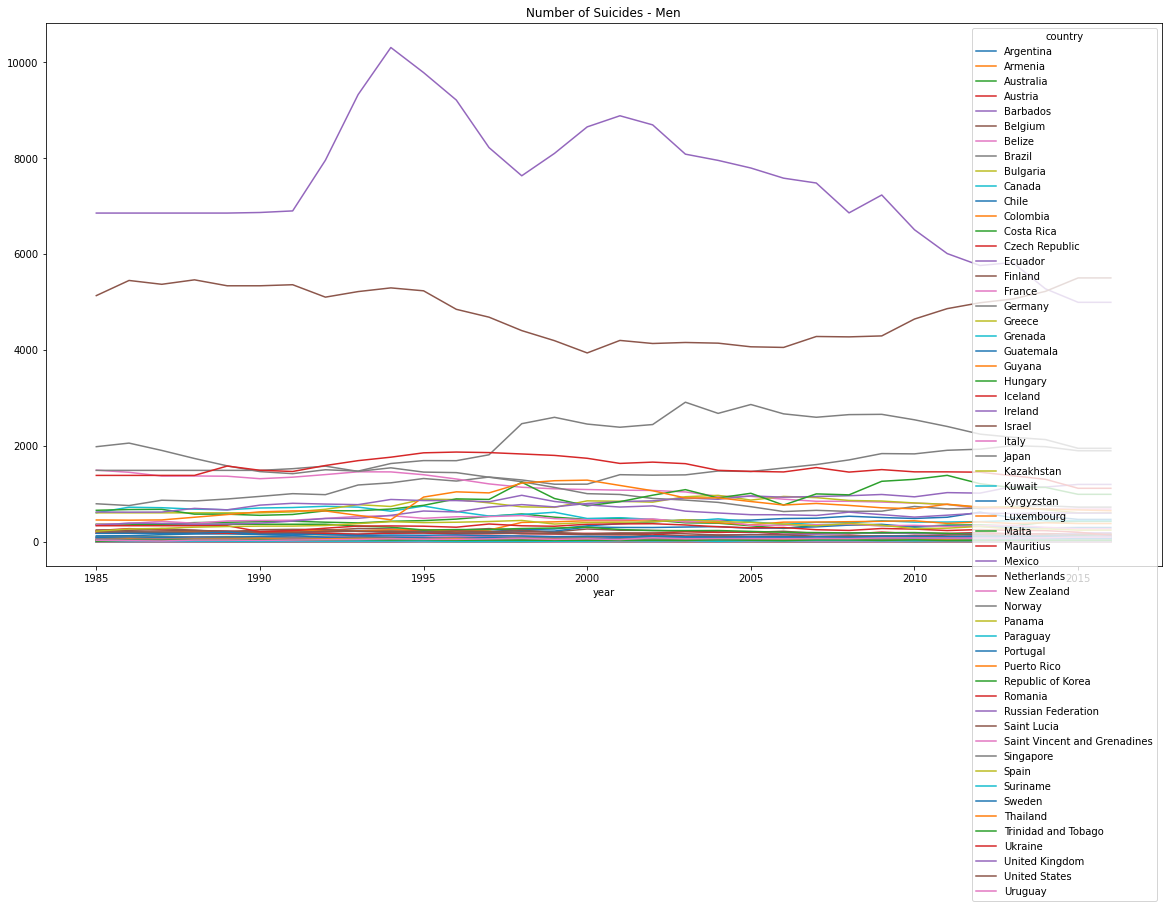

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

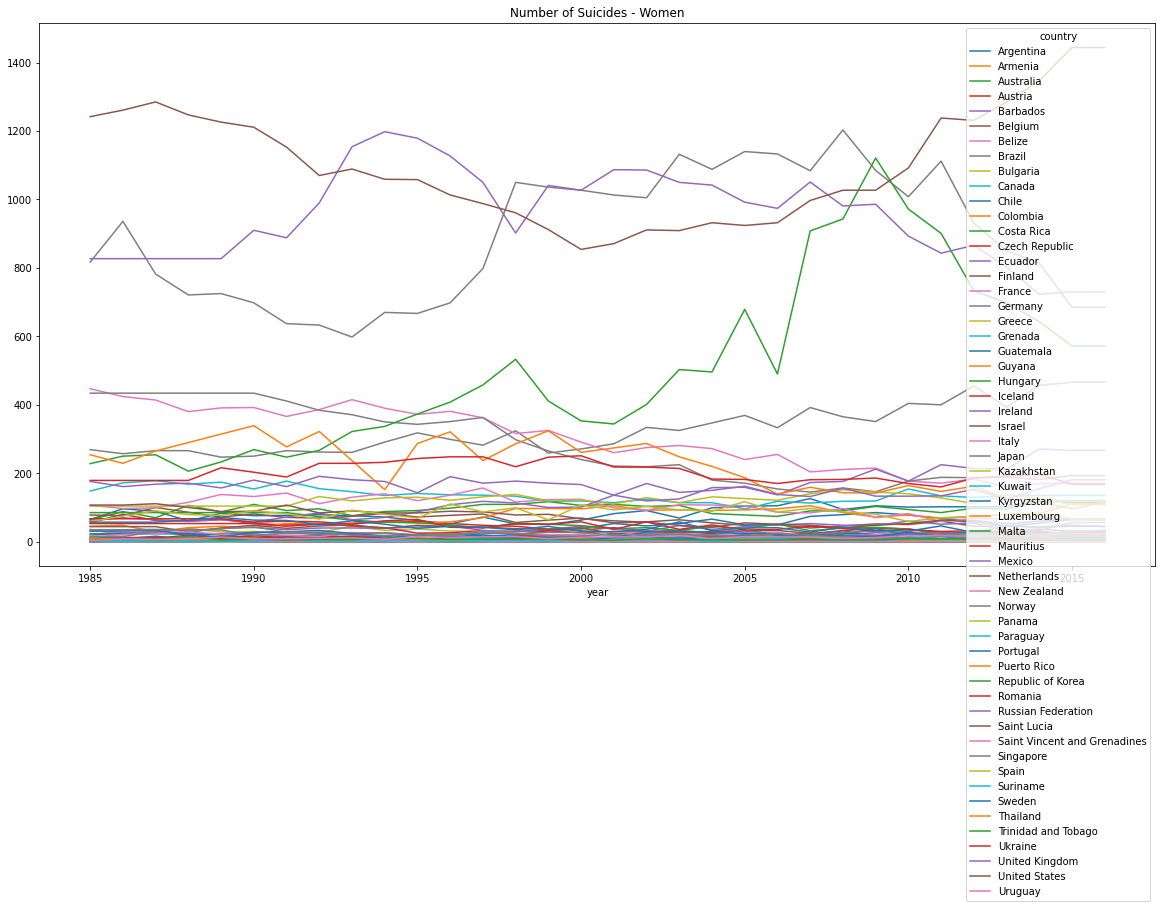

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance



In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[ 3  4  3  4  4  4  4  8  4  5  3  3  4  4  4  4  7  7  4  4  4  4  3  4
  4  4  3 10  6  4  4  4  4  4  6  4  4  4  4  4  4  4  6  3  1  4  4  4
  3  4  4  6  4  9  5  2  4]
Cluster 3 number of entries 8


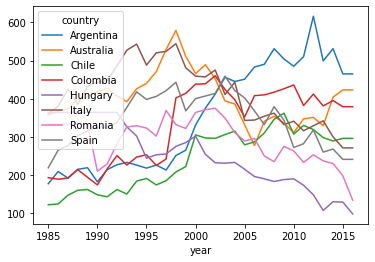

Cluster 4 number of entries 36


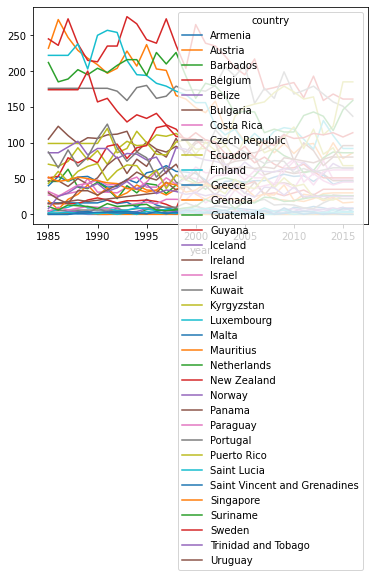

Cluster 8 number of entries 1


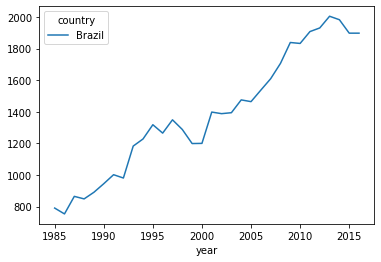

Cluster 5 number of entries 2


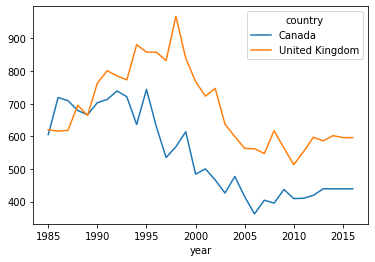

Cluster 7 number of entries 2


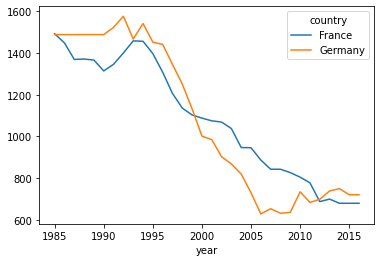

Cluster 10 number of entries 1


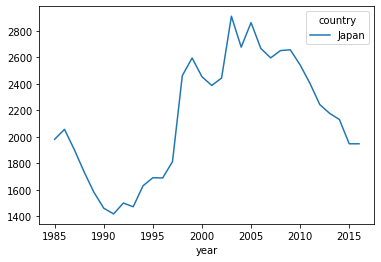

Cluster 6 number of entries 4


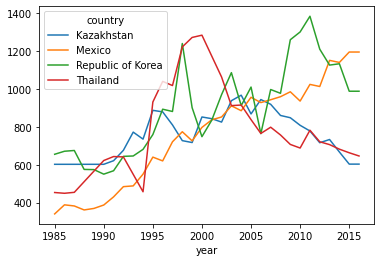

Cluster 1 number of entries 1


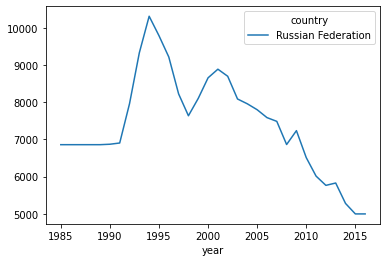

Cluster 9 number of entries 1


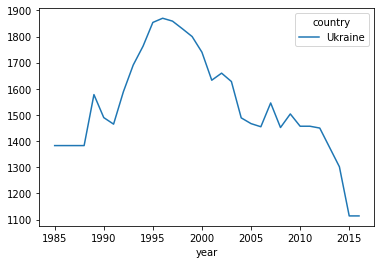

Cluster 2 number of entries 1


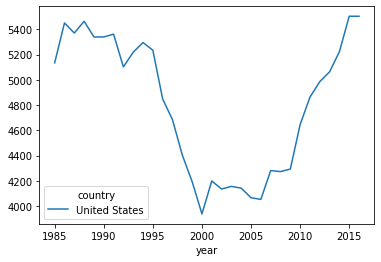

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[ 4  6  4  5  6  5  6  9  6  4  5  4  6  5  5  5  7  7  6  6  6  6  5  6
  6  6  4  1  4  6  6  6  6  6  4  5  6  6  6  6  6  6 10  5  2  6  6  6
  4  6  5  8  6  8  4  3  6]
Cluster 4 number of entries 9


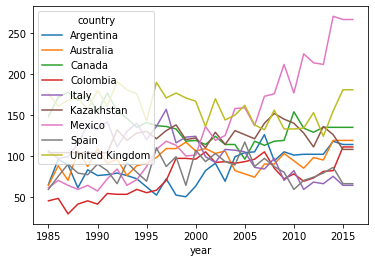

Cluster 6 number of entries 29


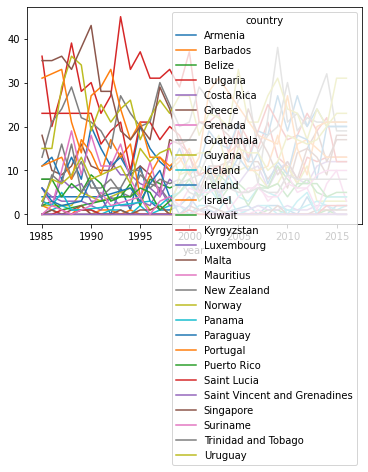

Cluster 5 number of entries 10


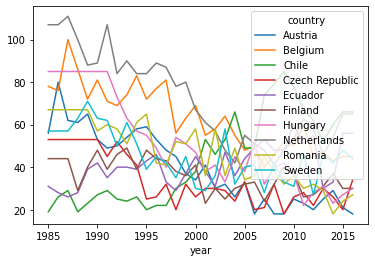

Cluster 9 number of entries 1


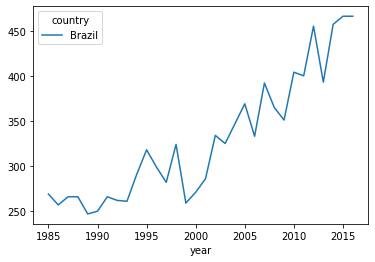

Cluster 7 number of entries 2


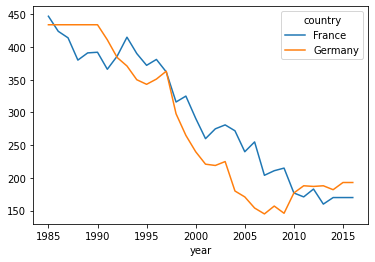

Cluster 1 number of entries 1


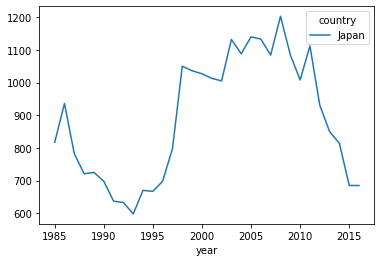

Cluster 10 number of entries 1


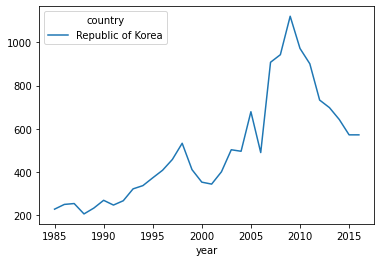

Cluster 2 number of entries 1


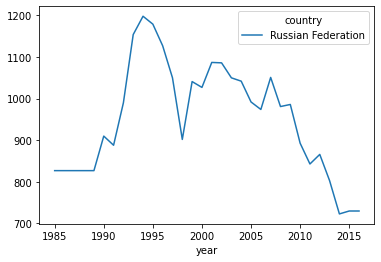

Cluster 8 number of entries 2


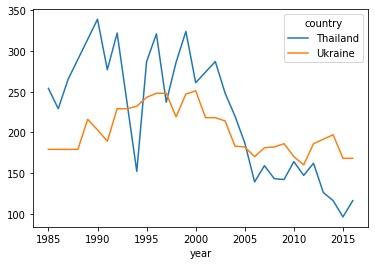

Cluster 3 number of entries 1


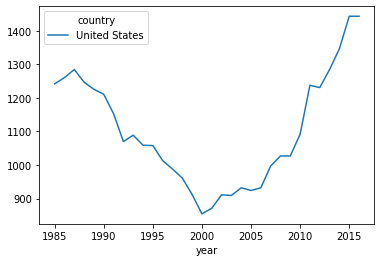

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

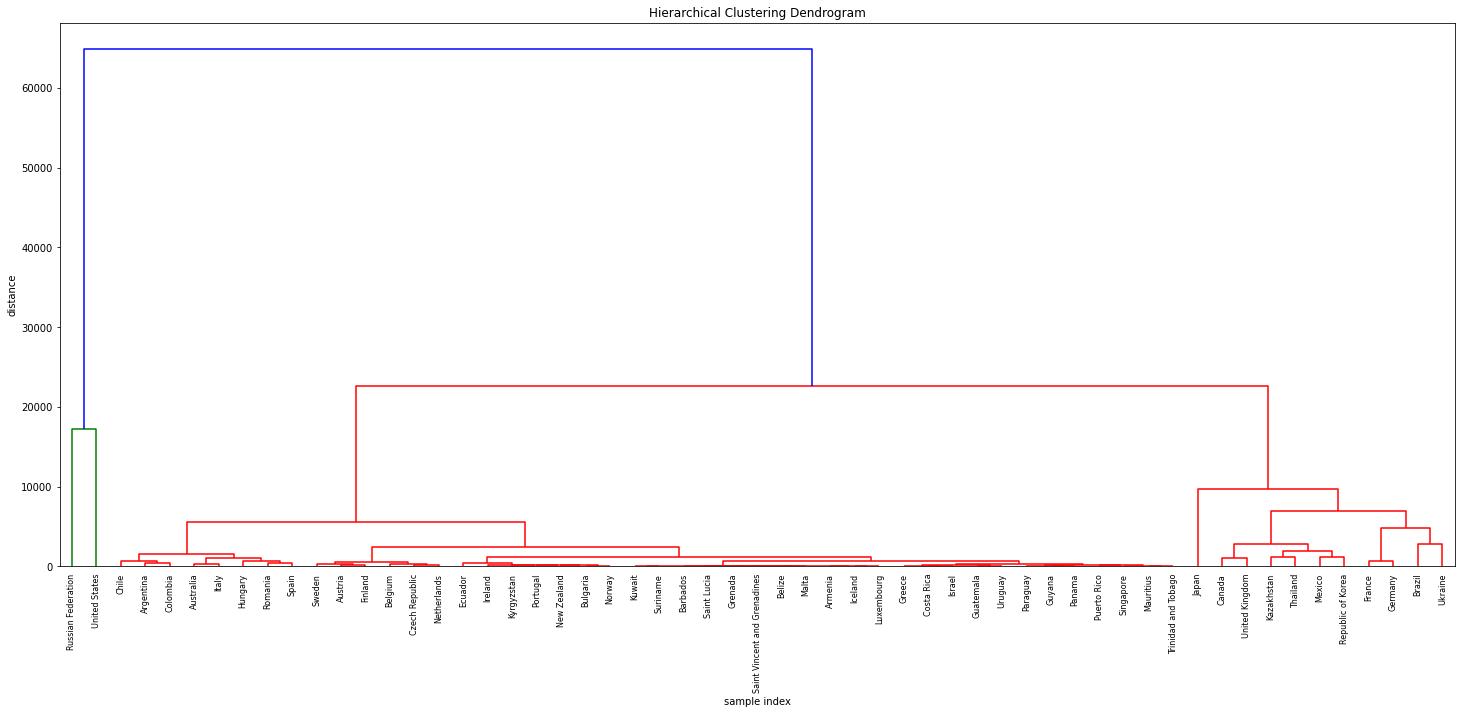

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

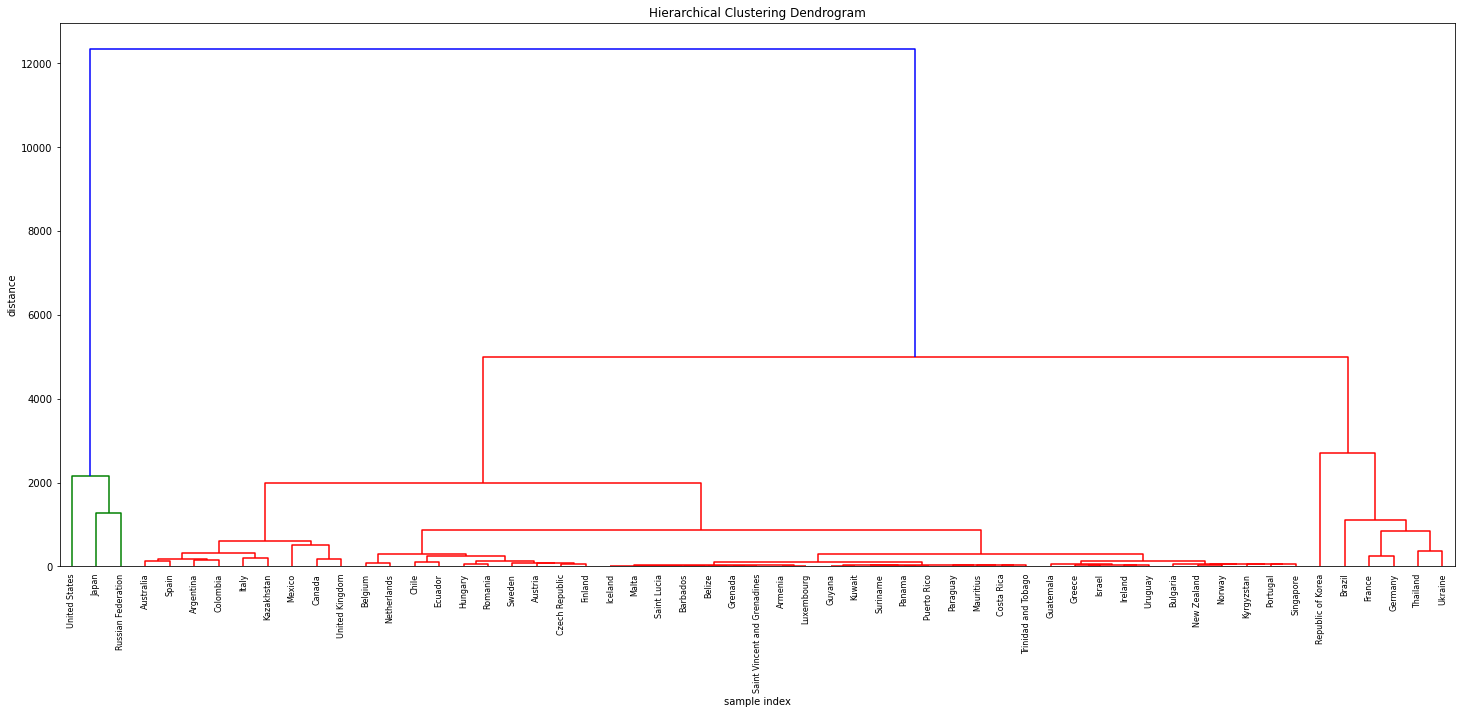

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 2 D. Using the method Single with the metrics: Pearson Correlation, Spearman Correlation and Dynamic Time Warpping



In [ ]:
Z1 = hac.linkage(inter_ts.T, method='single', metric='correlation')
Z1_f = hac.linkage(inter_ts_fem.T, method='single', metric='correlation')


### 2 E. Plot the 3 dendrograms: single, correlation


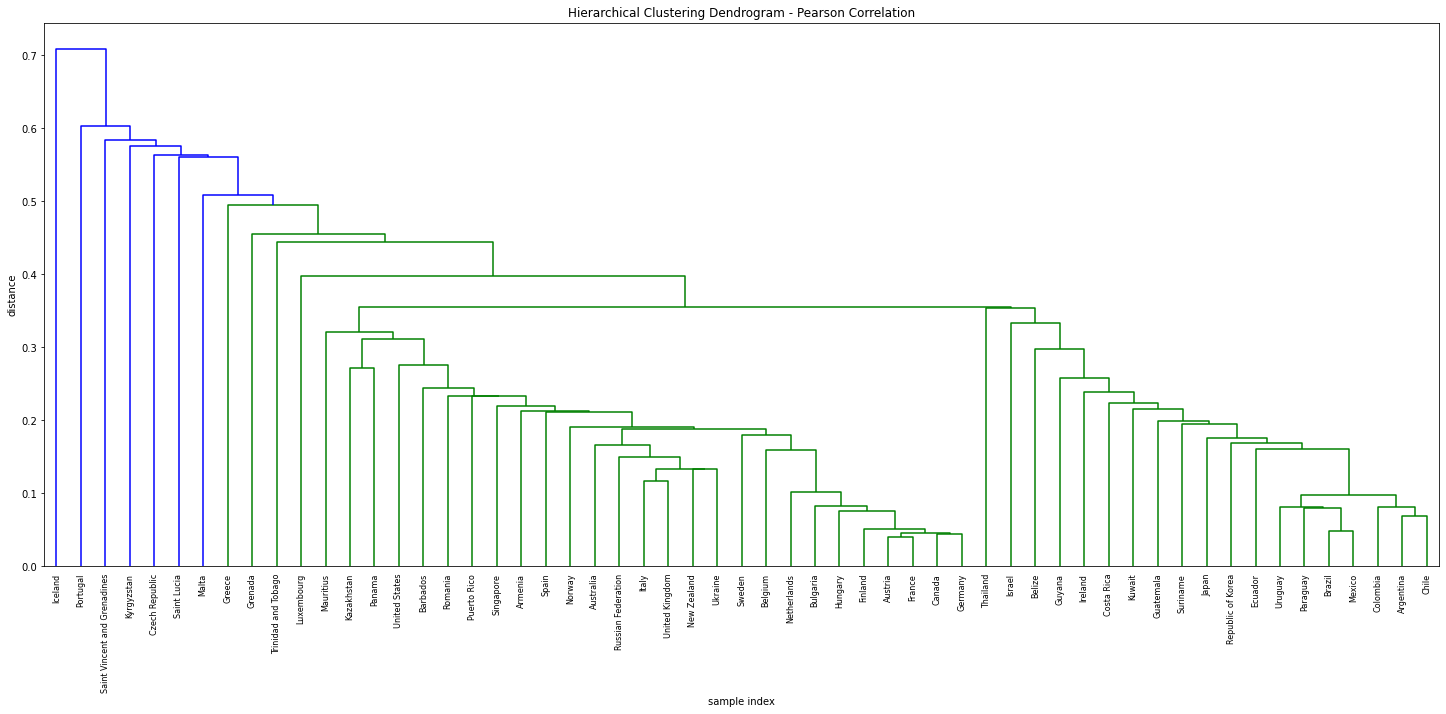

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Pearson Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z1,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

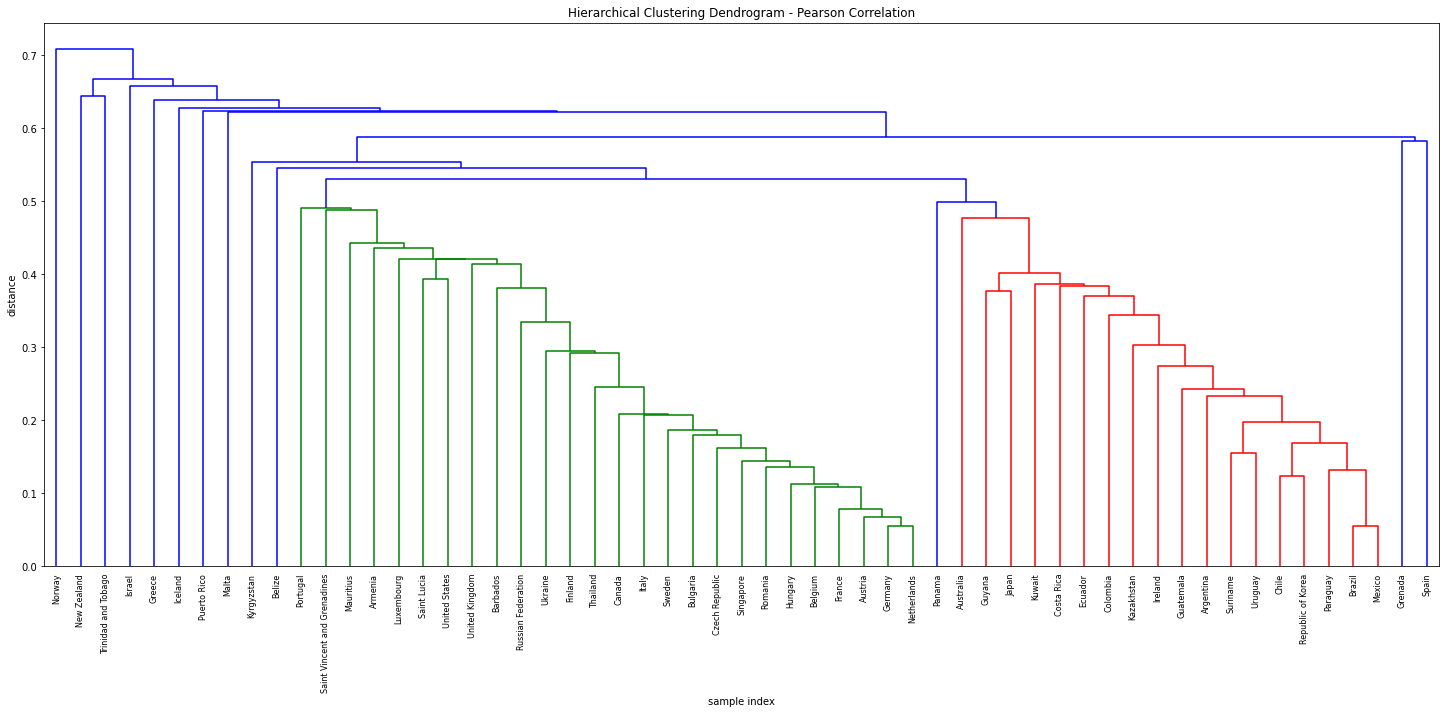

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Pearson Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z1_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.spearmanr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2
Z2 = hac.linkage(inter_ts.T, method='single', metric=my_metric)
Z2_f = hac.linkage(inter_ts_fem.T, method='single', metric=my_metric)

### 2 E. Plot the 3 dendrograms: single, Spearman


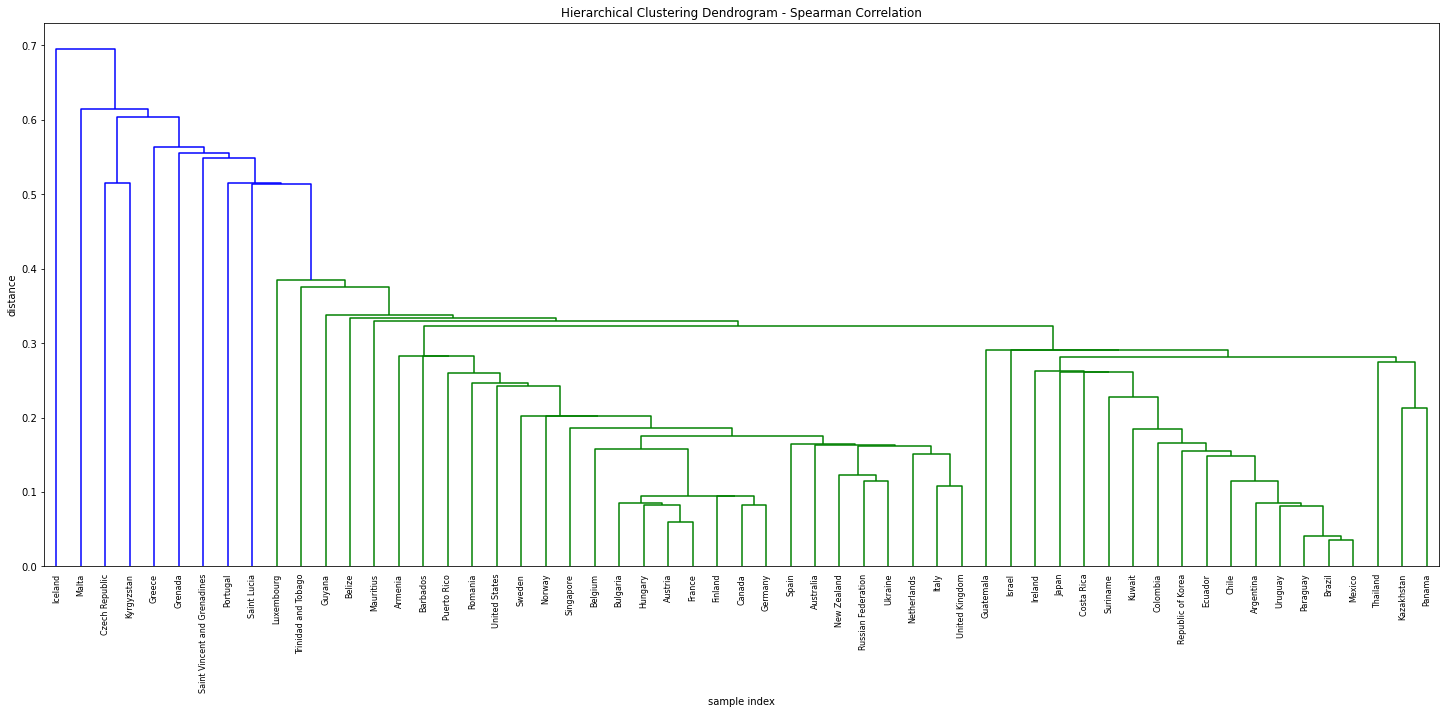

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Spearman Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z2,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

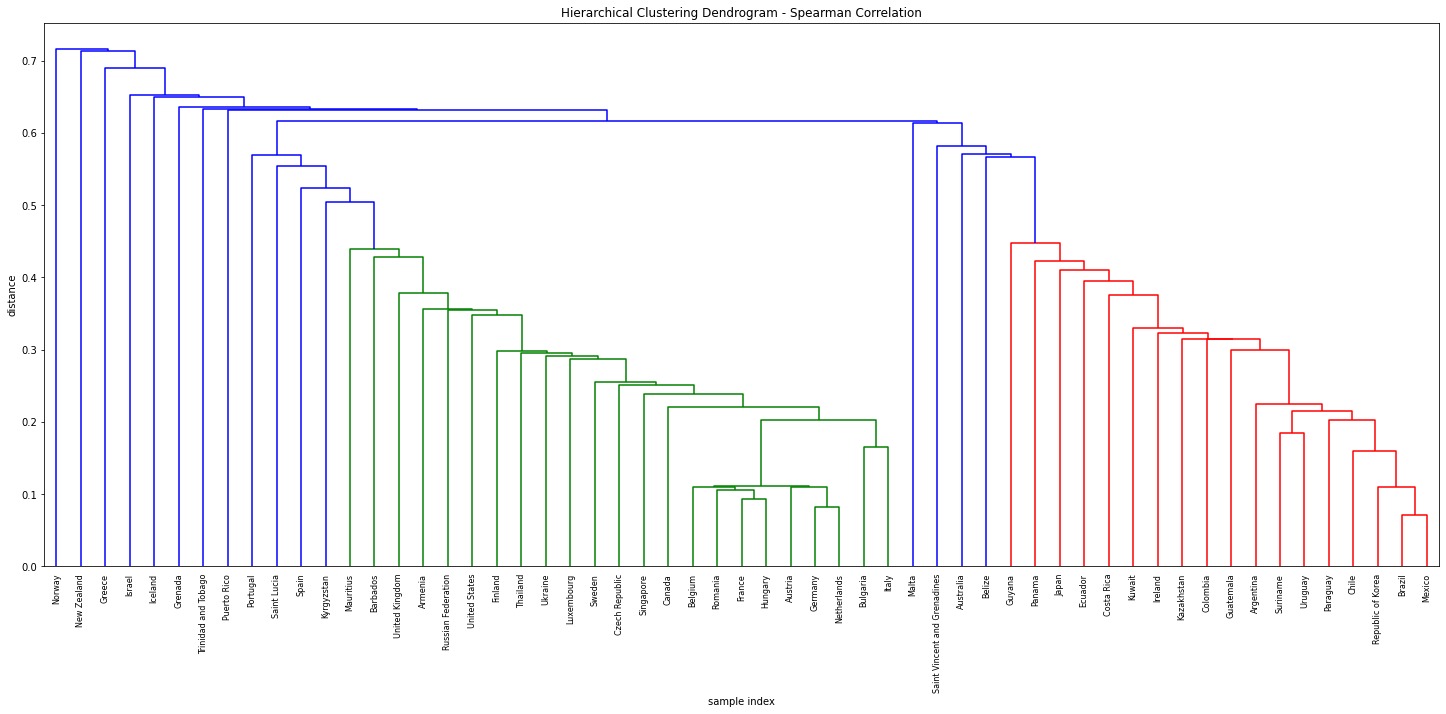

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Spearman Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z2_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


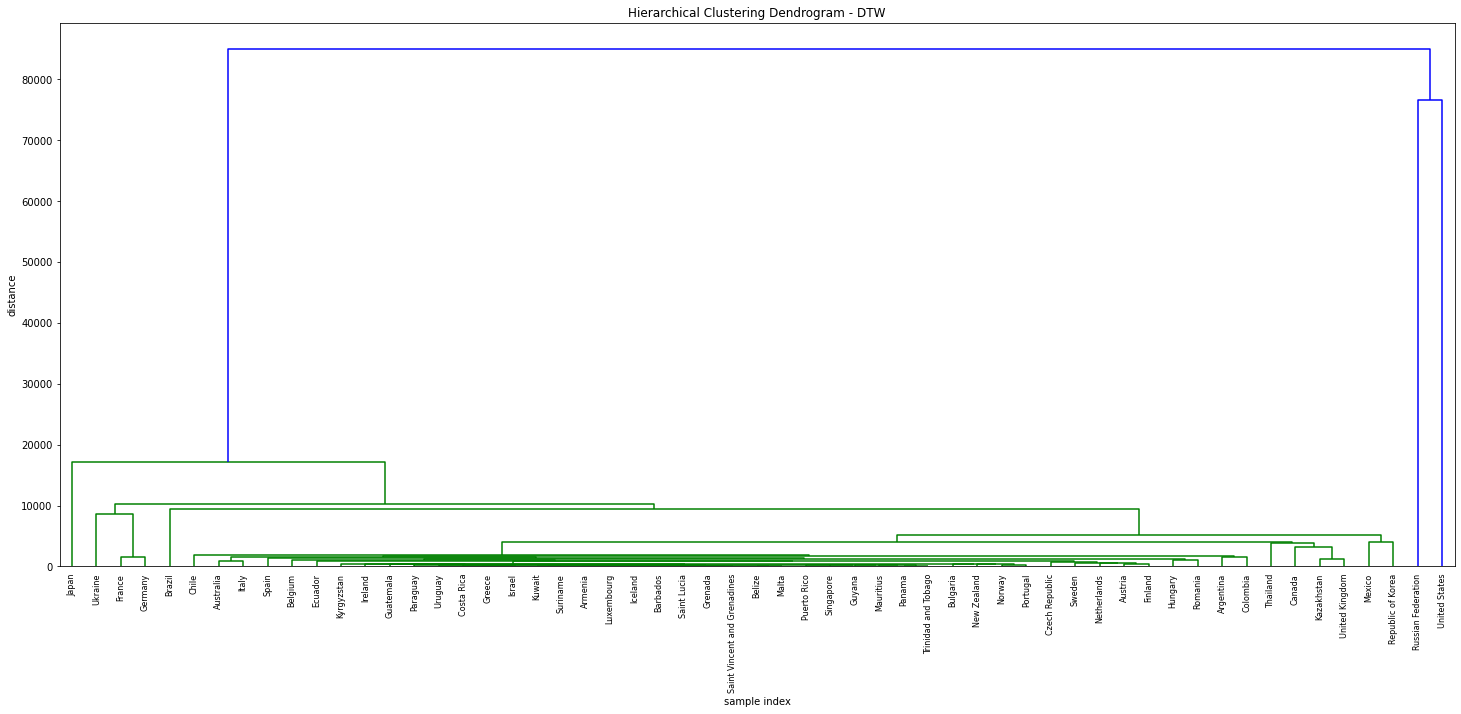

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

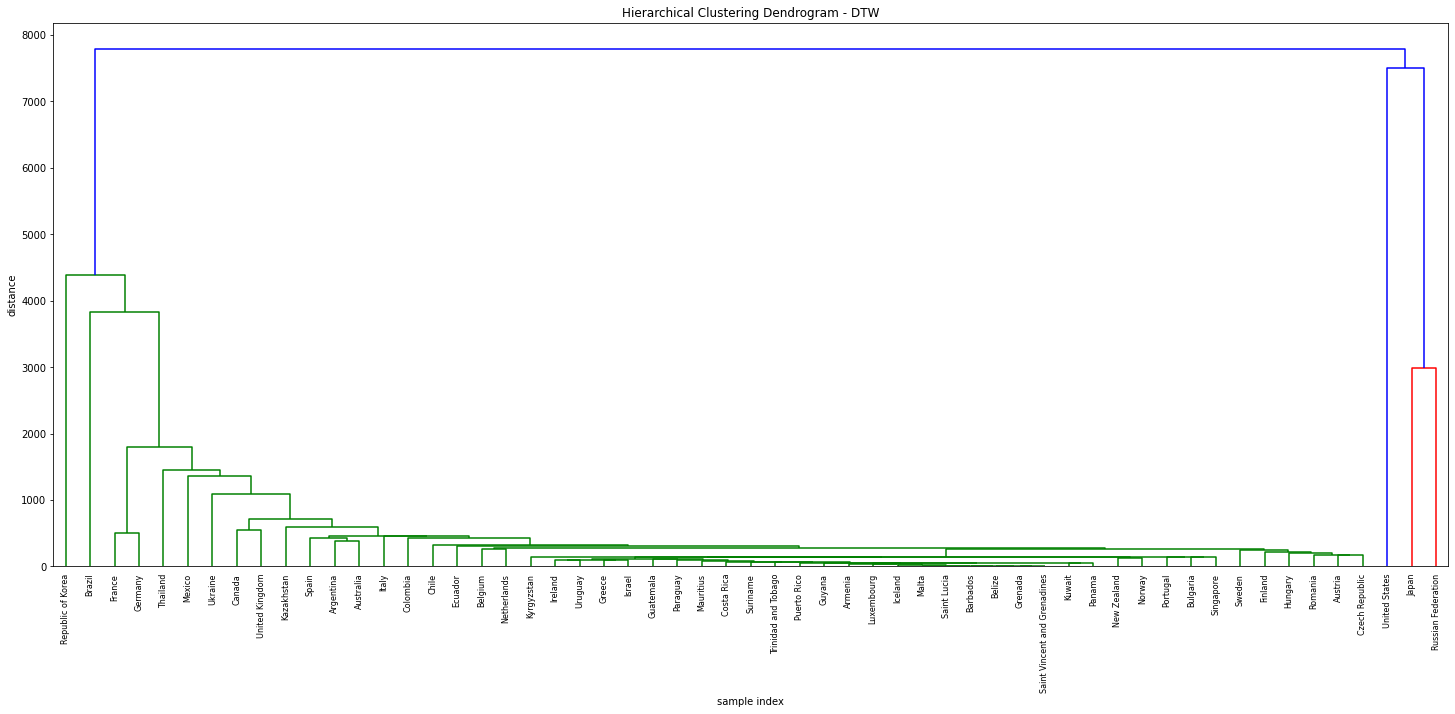

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-Pearson Correlation:



[ 1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1  3  2  1  1  1 10
  1  1  1  1  1  1  7  1  4  1  1  1  1  1  1  1  9  1  1  1  1  5  8  1
  1  1  1  1  1  1  1  1  1]
Cluster 1 number of entries 48


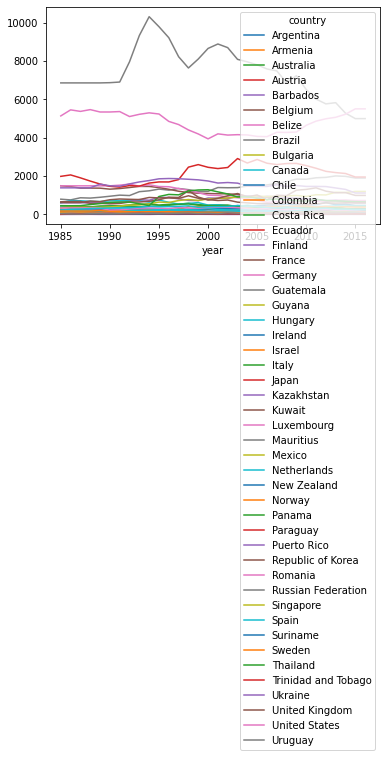

Cluster 6 number of entries 1


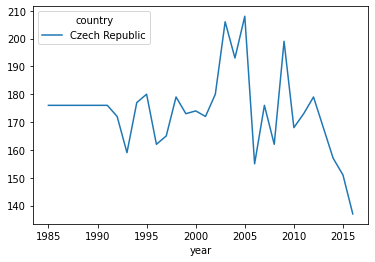

Cluster 3 number of entries 1


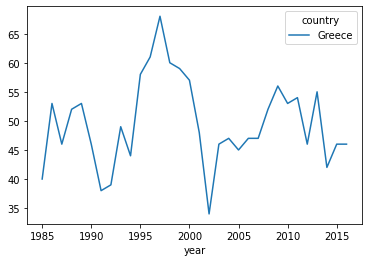

Cluster 2 number of entries 1


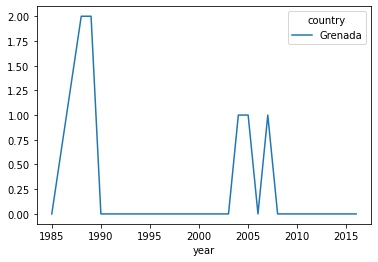

Cluster 10 number of entries 1


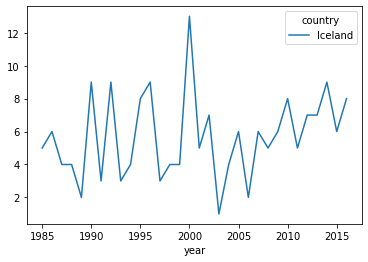

Cluster 7 number of entries 1


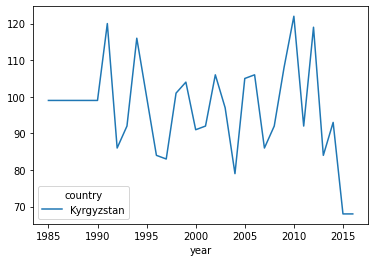

Cluster 4 number of entries 1


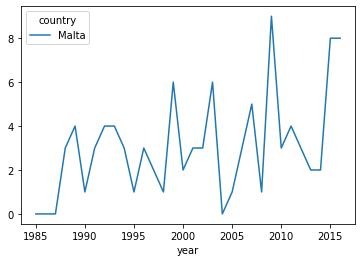

Cluster 9 number of entries 1


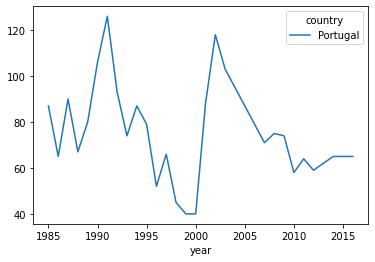

Cluster 5 number of entries 1


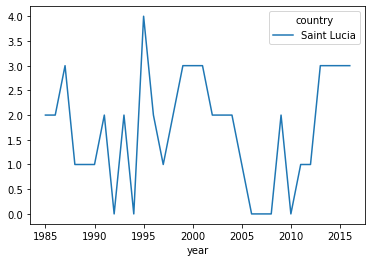

Cluster 8 number of entries 1


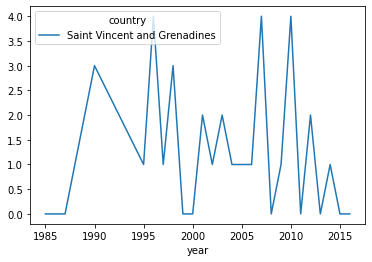

In [ ]:
print_clusters(inter_ts.T, Z1, 10, True)

[ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  8  4  3  3  3  7
  3  9  3  3  3  3  3  3  5  3  3  3  1 10  3  3  3  6  3  3  3  3  3  3
  4  3  3  3  2  3  3  3  3]
Cluster 3 number of entries 47


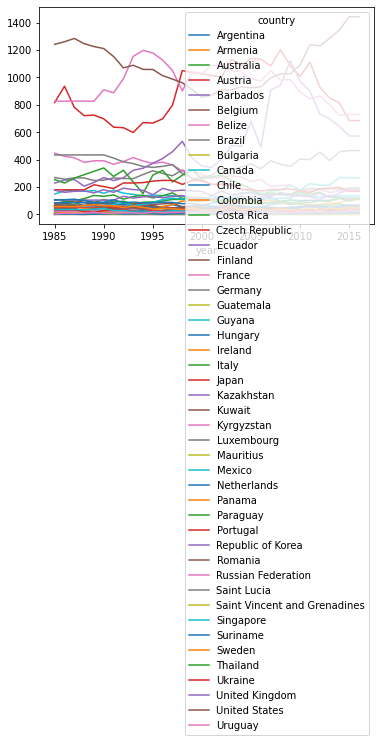

Cluster 8 number of entries 1


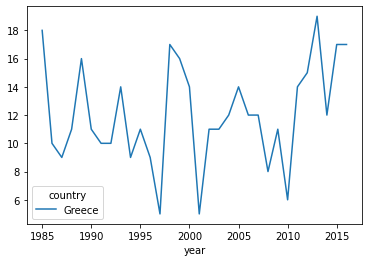

Cluster 4 number of entries 2


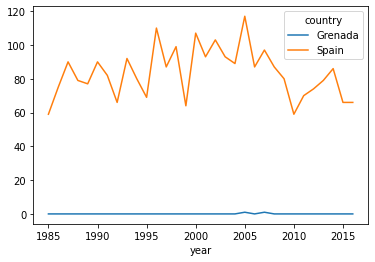

Cluster 7 number of entries 1


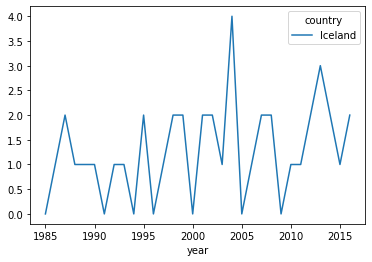

Cluster 9 number of entries 1


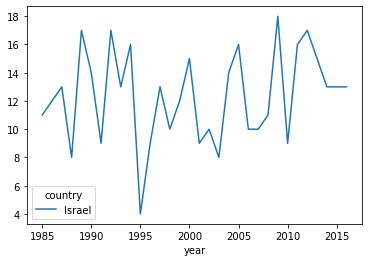

Cluster 5 number of entries 1


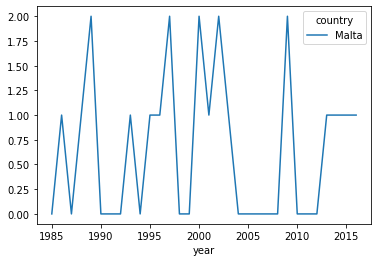

Cluster 1 number of entries 1


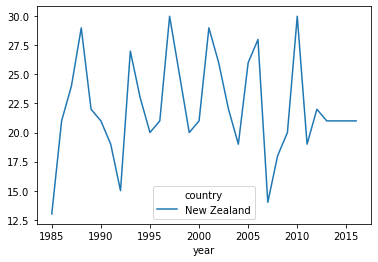

Cluster 10 number of entries 1


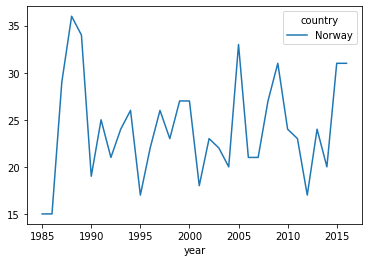

Cluster 6 number of entries 1


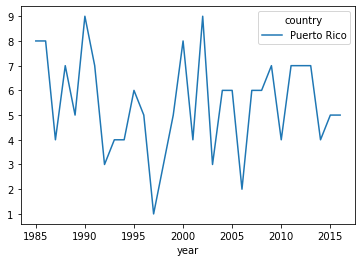

Cluster 2 number of entries 1


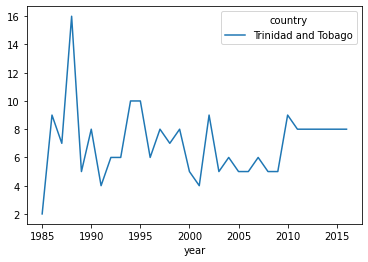

In [ ]:
print_clusters(inter_ts_fem.T, Z1_f, 10, True)

### For the case of simple-Spearman Correlation:

 

[ 3  3  3  3  3  3  3  3  3  3  3  3  3  1  3  3  3  3  8  7  3  3  3 10
  3  3  3  3  3  3  2  3  9  3  3  3  3  3  3  3  5  3  3  3  3  4  6  3
  3  3  3  3  3  3  3  3  3]
Cluster 3 number of entries 48


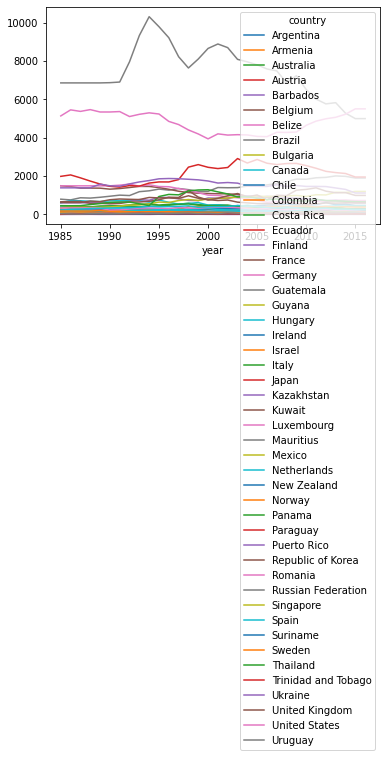

Cluster 1 number of entries 1


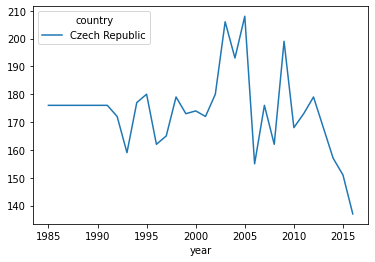

Cluster 8 number of entries 1


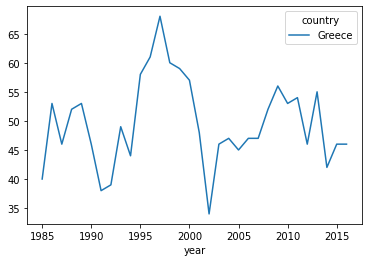

Cluster 7 number of entries 1


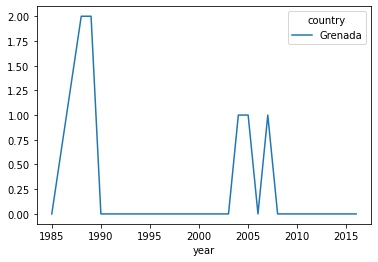

Cluster 10 number of entries 1


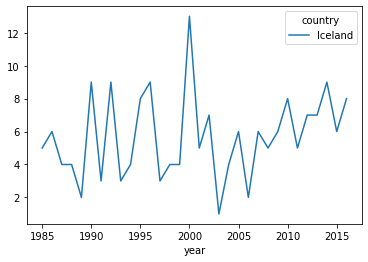

Cluster 2 number of entries 1


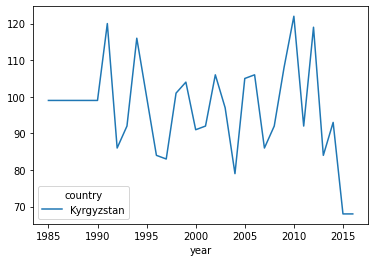

Cluster 9 number of entries 1


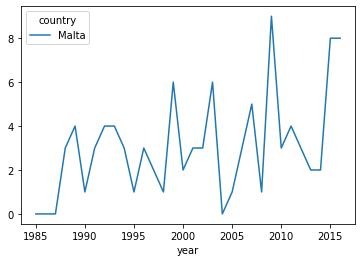

Cluster 5 number of entries 1


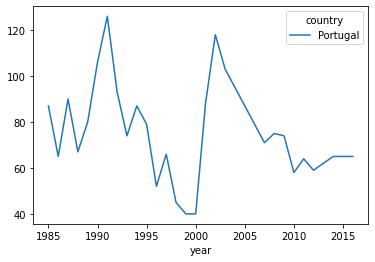

Cluster 4 number of entries 1


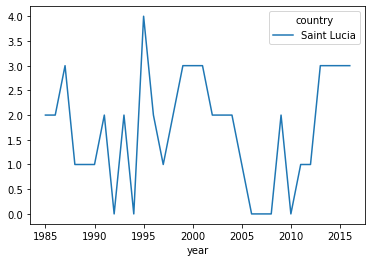

Cluster 6 number of entries 1


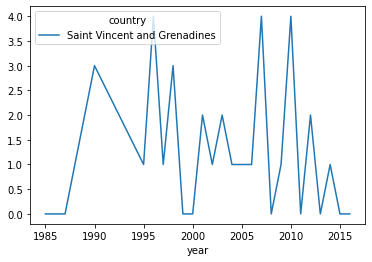

In [ ]:
print_clusters(inter_ts.T, Z2, 10, True)

[ 2  1  2  1  1  1  2  2  1  1  2  2  2  1  2  1  1  1  8  5  2  2  1  6
  2  7  1  2  2  2  1  1  2  1  2  1  9 10  2  2  1  3  2  1  1  1  2  1
  1  2  1  1  4  1  1  1  2]
Cluster 2 number of entries 22


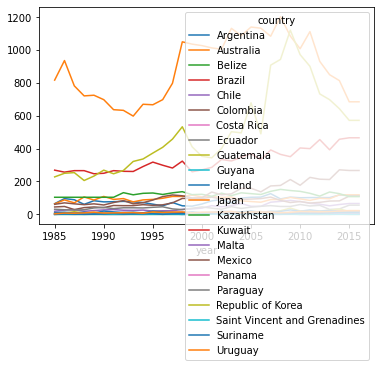

Cluster 1 number of entries 27


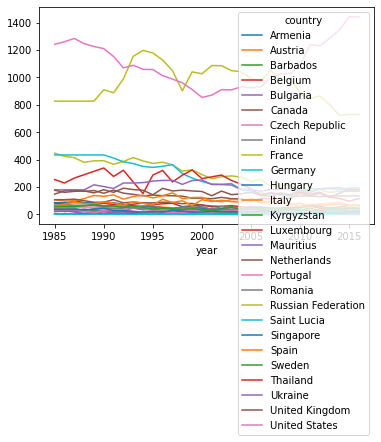

Cluster 8 number of entries 1


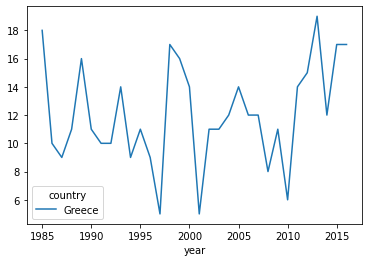

Cluster 5 number of entries 1


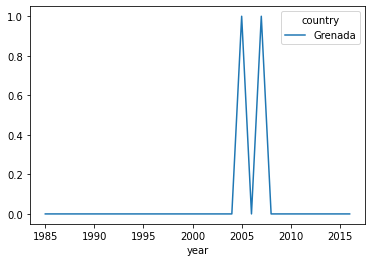

Cluster 6 number of entries 1


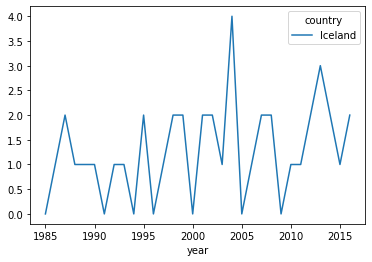

Cluster 7 number of entries 1


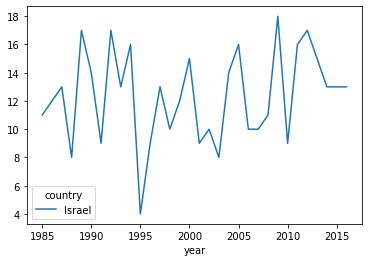

Cluster 9 number of entries 1


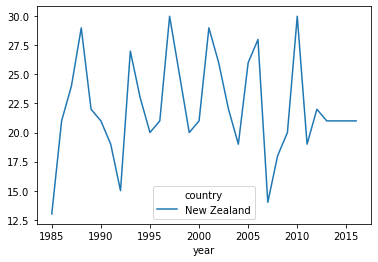

Cluster 10 number of entries 1


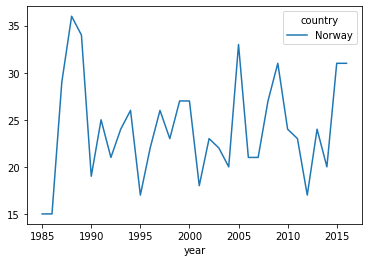

Cluster 3 number of entries 1


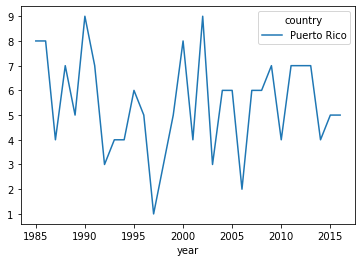

Cluster 4 number of entries 1


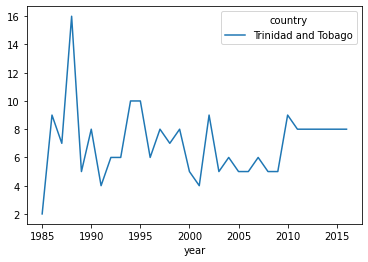

In [ ]:
print_clusters(inter_ts_fem.T, Z2_f, 10, True)

### For the case of simple-DTW:


[ 3  3  3  3  3  3  3  7  3  4  3  3  3  3  3  3  1  1  3  3  3  3  3  3
  3  3  3  8  4  3  3  3  3  3  5  3  3  3  3  3  3  3  6  3  9  3  3  3
  3  3  3  4  3  2  4 10  3]
Cluster 3 number of entries 44


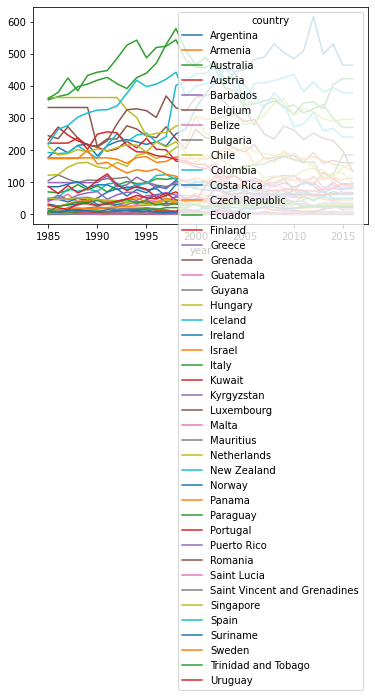

Cluster 7 number of entries 1


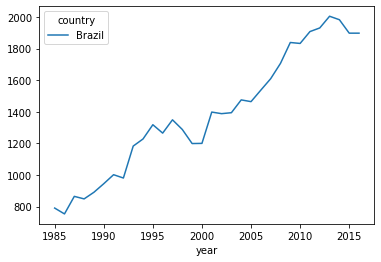

Cluster 4 number of entries 4


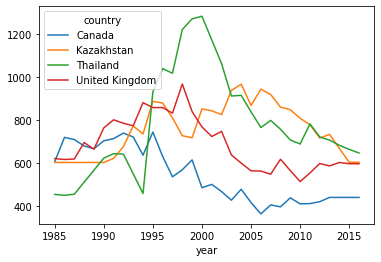

Cluster 1 number of entries 2


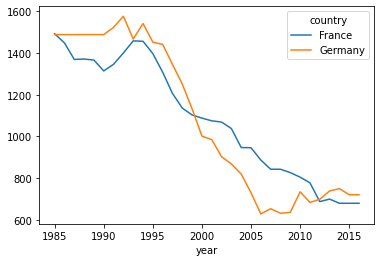

Cluster 8 number of entries 1


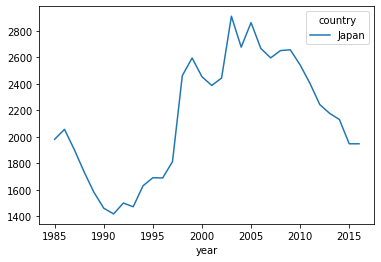

Cluster 5 number of entries 1


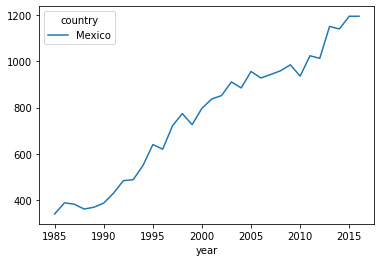

Cluster 6 number of entries 1


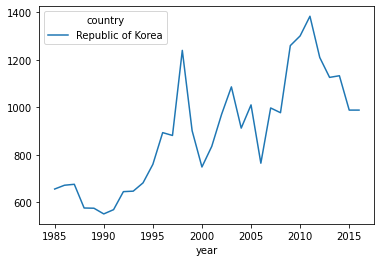

Cluster 9 number of entries 1


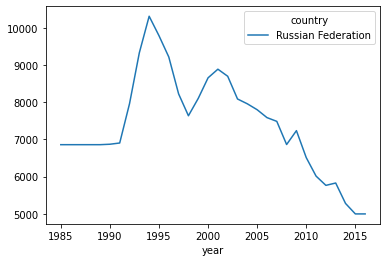

Cluster 2 number of entries 1


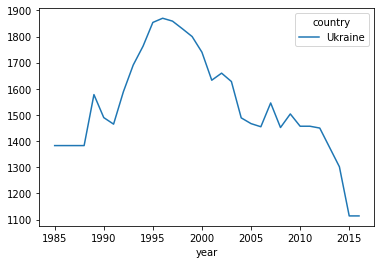

Cluster 10 number of entries 1


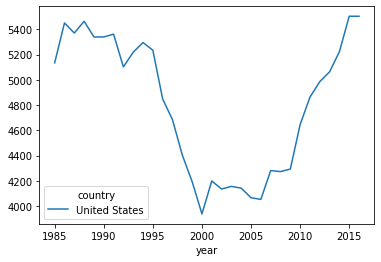

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 2  2  2  2  2  2  2  6  2  2  2  2  2  2  2  2  1  1  2  2  2  2  2  2
  2  2  2  8  2  2  2  2  2  2  4  2  2  2  2  2  2  2  7  2  9  2  2  2
  2  2  2  5  2  3  2 10  2]
Cluster 2 number of entries 47


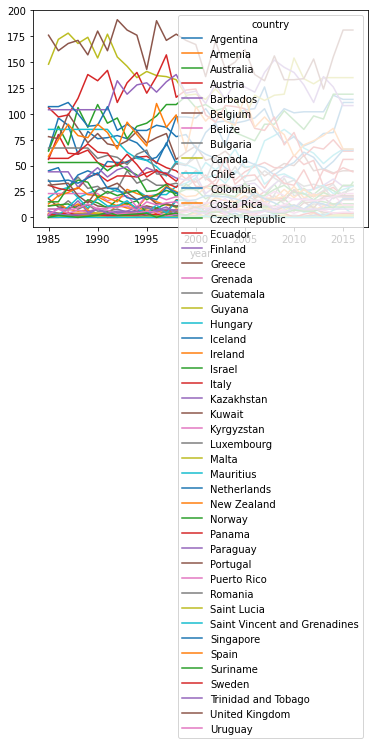

Cluster 6 number of entries 1


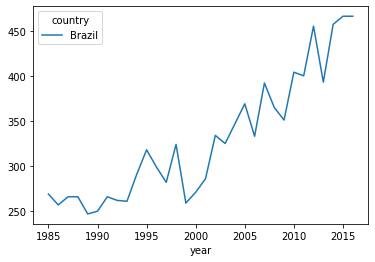

Cluster 1 number of entries 2


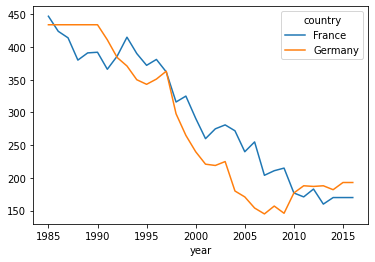

Cluster 8 number of entries 1


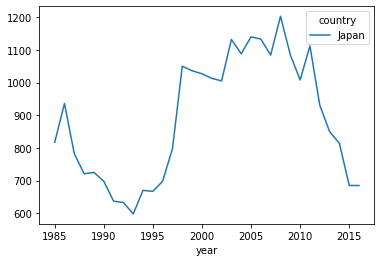

Cluster 4 number of entries 1


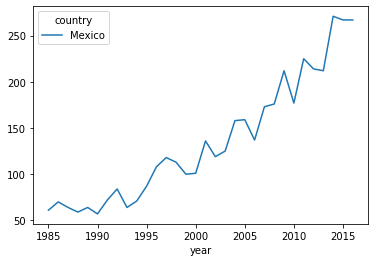

Cluster 7 number of entries 1


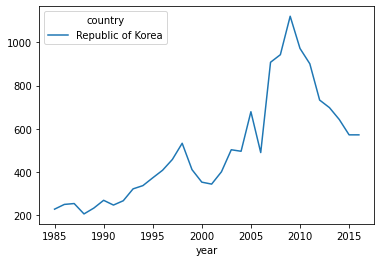

Cluster 9 number of entries 1


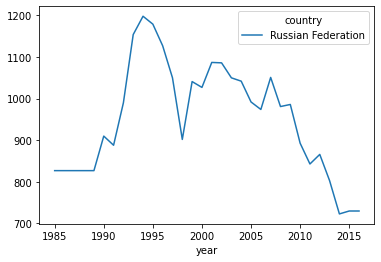

Cluster 5 number of entries 1


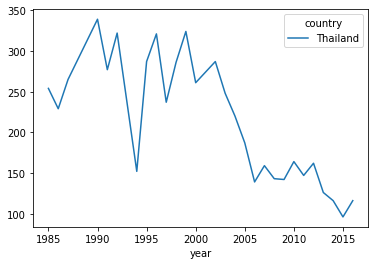

Cluster 3 number of entries 1


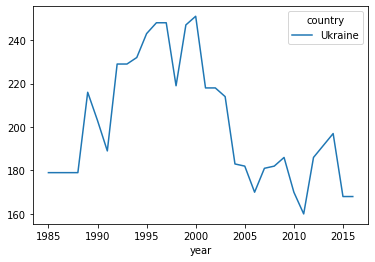

Cluster 10 number of entries 1


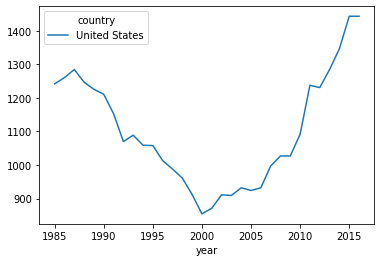

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)